# 602 Final Project

Submitted by Team_5

Ashish Kesari

Sujith Cholleti

Teja

Dheeraj

Zarak

Dataset link: https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew/data

The dataset is extraced from the Chicago open portal data.

### Payment Mode Prediction

#### Objective
The cost and payment methods for taxi rides can vary depending on factors such as distance, time, and payment policies. To ensure a smooth experience for passengers and drivers, taxi companies must implement accurate fare estimation and provide multiple payment options.

predicting the payment mode can also provide valuable insights for taxi companies or ride-hailing services. By analyzing the payment data, they can better understand the preferences of their customers and tailor their services accordingly. This can lead to improved customer satisfaction, increased loyalty, and ultimately, better business performance.


#### Why predicting Payment mode ?

Driver Perspective: By predicting the payment mode for taxi rides, drivers can make more informed decisions about where and when to drive. If drivers know which areas have a higher demand for credit card payments, they can focus their efforts in those areas and potentially earn more money.


Customer Perspective: Payment mode prediction can help customers estimate the cost of their ride and choose a payment method that suits their needs. This can also help reduce waiting times for customers who prefer to pay by credit card, which can lead to a more positive customer experience.


Taxi Company Perspective: By understanding their customers' payment preferences, taxi companies can optimize their payment processing systems and potentially increase revenue.


 ***Categorical variables:***

Trip ID

Taxi ID

Payment Type

Company


***Continuous variables:***

Pickup Centroid Location

Dropoff Centroid Location

Trip Start Timestamp

Trip End Timestamp

Trip Seconds

Trip Miles

Pickup Census Tract

Dropoff Census Tract

Pickup Community Area

Dropoff Community Area

Fare

Tips

Tolls

Extras

Trip Total

Pickup Centroid Latitude

Pickup Centroid Longitude

Dropoff Centroid Latitude

Dropoff Centroid Longitude

### Importing Basic Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Defining the file path

After Importing basic libraries, we have defined the path for dataframe

In [ ]:
# Define the file path
file_path = r'/Users/ashishkesari/Desktop/602 final proj/TaxiTrips_filtered.csv'

# Read the CSV file into a pandas DataFrame
taxi_data = pd.read_csv(file_path)


In [ ]:
taxi_data

,Unnamed: 0,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,300000,6b39a1a9f0a0c43d143b8c6b64e670508784b274,11bf41ca022245921f29bf136908c1605da3b5ad5e76fe...,01/16/2014 02:45:00 PM,01/16/2014 03:15:00 PM,1380.0,3.9,NaN,NaN,8.0,...,0.0,17.55,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
1,300001,e382992537a91c0421203b9aee7b651aedbf293a,4388ce18f1c58dc7660241a6c4133c135be764cc2abf75...,01/21/2014 12:00:00 PM,01/21/2014 12:00:00 PM,180.0,0.7,NaN,NaN,7.0,...,0.0,4.65,Cash,Taxi Affiliation Services,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,300002,a58bc51333b7d11e420a72d696a524bd2976d23f,9980554f20602531547b95999bd62f0e1c60ac5213e7fb...,01/21/2014 10:00:00 AM,01/21/2014 10:30:00 AM,2340.0,0.0,1.703198e+10,1.703108e+10,56.0,...,2.0,39.40,Credit Card,Taxi Affiliation Services,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
3,300003,283e36242279a68a0974ff408b185a5d90112021,55f31dbe9be541d894918b55b4cf2b074ab62f9e2f3a6d...,01/16/2014 01:15:00 AM,01/16/2014 01:15:00 AM,540.0,0.0,1.703183e+10,1.703106e+10,7.0,...,0.0,7.65,Cash,Taxi Affiliation Services,41.914747,-87.654007,POINT (-87.6540070286 41.9147473049),41.942577,-87.647079,POINT (-87.6470785093 41.942577185)
4,300004,a3692a89dfc322db8b2d045ae3e910ad1a7b3a21,ab6b0472a82102ae6875f5297519510f5664a3b4a3559e...,07/29/2014 06:15:00 PM,07/29/2014 06:30:00 PM,900.0,2.3,NaN,NaN,32.0,...,0.0,11.85,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99738,399995,be58914a61301e807400efb53b0bd6b985777455,914eb4743f4f0cf65d610de826157588fdc289fb8a533d...,08/17/2014 12:00:00 AM,08/17/2014 12:15:00 AM,660.0,0.0,NaN,NaN,77.0,...,1.0,12.45,Credit Card,Dispatch Taxi Affiliation,41.986712,-87.663416,POINT (-87.6634164054 41.9867117999),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
99739,399996,9cf725a4968ce123a1b896eaff4373819e31ea8b,045270ae331ab61646c36aaf542de0077e97a5b0294e29...,01/16/2014 09:45:00 AM,01/16/2014 09:45:00 AM,60.0,0.0,1.703132e+10,1.703132e+10,32.0,...,1.0,4.25,Dispute,Choice Taxi Association,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
99740,399997,fcea28f033f0480642f57998dd9c28d0008f9b9e,a5773b01fdb93b30f2654acc2ce7fee5319896755a36e8...,07/26/2014 08:15:00 PM,07/26/2014 08:30:00 PM,480.0,0.1,1.703108e+10,1.703124e+10,8.0,...,0.0,9.45,Credit Card,Taxi Affiliation Services,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.906651,-87.665338,POINT (-87.6653376596 41.9066507664)
99741,399998,9f9fa7b5828339ddfbd8e2cca4a525c57cbcea18,c6f0691bf1bd7155c05ca409582d6394b356d8d57315b1...,01/24/2014 08:15:00 PM,01/24/2014 08:30:00 PM,1440.0,9.1,NaN,NaN,32.0,...,0.0,27.85,Credit Card,Dispatch Taxi Affiliation,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.975171,-87.687516,POINT (-87.68751551520002 41.9751709433)


Initially our dataframe had 99743 rows and 24 columns

In [ ]:
import pandas as pd

# Replace "filename.csv" with the name of your CSV file
df = taxi_data

# Convert the "Trip Start Timestamp" column to a datetime object
df["Trip Start Timestamp"] = pd.to_datetime(df["Trip Start Timestamp"], errors="coerce")

# Filter the DataFrame to include only rows where the year is 2014 and miles are less than 35
new_df = df[(df["Trip Start Timestamp"].dt.year == 2014) & (df["Trip Miles"] <= 35)]

new_df = new_df[new_df["Trip Miles"] > 0]

# Write the filtered DataFrame to a new CSV file
new_df.to_csv("filtered_file.csv", index=False)


As the Chicago city is limited to 35 miles, we have filtered by limiting the whole dataset within the 35 miles and also we have considered only the trips which took place in 2014 and also we have conidered the trips which have non zero miles.

In [ ]:
Taxi_df=pd.read_csv("filtered_file.csv",low_memory=False)
Taxi_df

,Unnamed: 0,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,300000,6b39a1a9f0a0c43d143b8c6b64e670508784b274,11bf41ca022245921f29bf136908c1605da3b5ad5e76fe...,2014-01-16 14:45:00,01/16/2014 03:15:00 PM,1380.0,3.9,NaN,NaN,8.0,...,0.0,17.55,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
1,300001,e382992537a91c0421203b9aee7b651aedbf293a,4388ce18f1c58dc7660241a6c4133c135be764cc2abf75...,2014-01-21 12:00:00,01/21/2014 12:00:00 PM,180.0,0.7,NaN,NaN,7.0,...,0.0,4.65,Cash,Taxi Affiliation Services,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,300004,a3692a89dfc322db8b2d045ae3e910ad1a7b3a21,ab6b0472a82102ae6875f5297519510f5664a3b4a3559e...,2014-07-29 18:15:00,07/29/2014 06:30:00 PM,900.0,2.3,NaN,NaN,32.0,...,0.0,11.85,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
3,300006,a4e38bfe3e9cd18c231898ac2128fd3a9158dc56,d3068a62a49dbec13e21fe5232de4358a74e761cce0091...,2014-01-25 02:15:00,01/25/2014 02:15:00 AM,420.0,1.1,1.703132e+10,1.703108e+10,32.0,...,1.5,7.75,Cash,Northwest Management LLC,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
4,300007,3718a3dbcfc067405b0b6cbc5f2b92cc2bd95efd,7f8c5c7d2db53a8c86c661199f322759984b3125ff0efa...,2014-08-16 18:45:00,08/16/2014 06:45:00 PM,240.0,0.7,1.703108e+10,1.703183e+10,8.0,...,0.0,5.05,Cash,Taxi Affiliation Services,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41860,399990,e9af2d775f593c941755c04727a8cff8690bc9b7,a61754fa7bcb6b5af968a16c00fc7b47947f764cbd6eda...,2014-08-17 00:30:00,08/17/2014 01:00:00 AM,1740.0,17.8,1.703198e+10,1.703108e+10,76.0,...,3.0,47.55,Credit Card,Dispatch Taxi Affiliation,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134)
41861,399994,bc3f20db27c9b23266138d487f3ddc8f5c1f73e7,b41c6dfa2b304ee42cef97192883742da96fe45e9833c8...,2014-01-21 09:30:00,01/21/2014 10:00:00 AM,1020.0,1.8,1.703108e+10,1.703184e+10,8.0,...,0.0,9.85,Cash,Choice Taxi Association,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
41862,399997,fcea28f033f0480642f57998dd9c28d0008f9b9e,a5773b01fdb93b30f2654acc2ce7fee5319896755a36e8...,2014-07-26 20:15:00,07/26/2014 08:30:00 PM,480.0,0.1,1.703108e+10,1.703124e+10,8.0,...,0.0,9.45,Credit Card,Taxi Affiliation Services,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.906651,-87.665338,POINT (-87.6653376596 41.9066507664)
41863,399998,9f9fa7b5828339ddfbd8e2cca4a525c57cbcea18,c6f0691bf1bd7155c05ca409582d6394b356d8d57315b1...,2014-01-24 20:15:00,01/24/2014 08:30:00 PM,1440.0,9.1,NaN,NaN,32.0,...,0.0,27.85,Credit Card,Dispatch Taxi Affiliation,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.975171,-87.687516,POINT (-87.68751551520002 41.9751709433)


This is the filtered data frame which consists of 41865 rows and 24 columns

Dropping down the column name "Unnamed: 0" from the dataframe

In [ ]:
Taxi_df=Taxi_df.drop("Unnamed: 0",axis=1)

In [ ]:
Taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41865 entries, 0 to 41864
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Trip ID                     41865 non-null  object 
 1   Taxi ID                     41865 non-null  object 
 2   Trip Start Timestamp        41865 non-null  object 
 3   Trip End Timestamp          41865 non-null  object 
 4   Trip Seconds                41865 non-null  float64
 5   Trip Miles                  41865 non-null  float64
 6   Pickup Census Tract         30732 non-null  float64
 7   Dropoff Census Tract        30663 non-null  float64
 8   Pickup Community Area       41260 non-null  float64
 9   Dropoff Community Area      40561 non-null  float64
 10  Fare                        41865 non-null  float64
 11  Tips                        41865 non-null  float64
 12  Tolls                       41865 non-null  float64
 13  Extras                      418

## Final Filtered DataFrame Structure

In [ ]:

# Get the number of rows using len()
num_rows = len(Taxi_df)

# Get the number of columns using len() on the first row of the DataFrame
num_cols = len(Taxi_df.columns)

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 41865
Number of columns: 23


So after filtering, the final dataframe that we gonna work conists of 41865 rows and 23 columns

## Histograms of features in the DataFrame

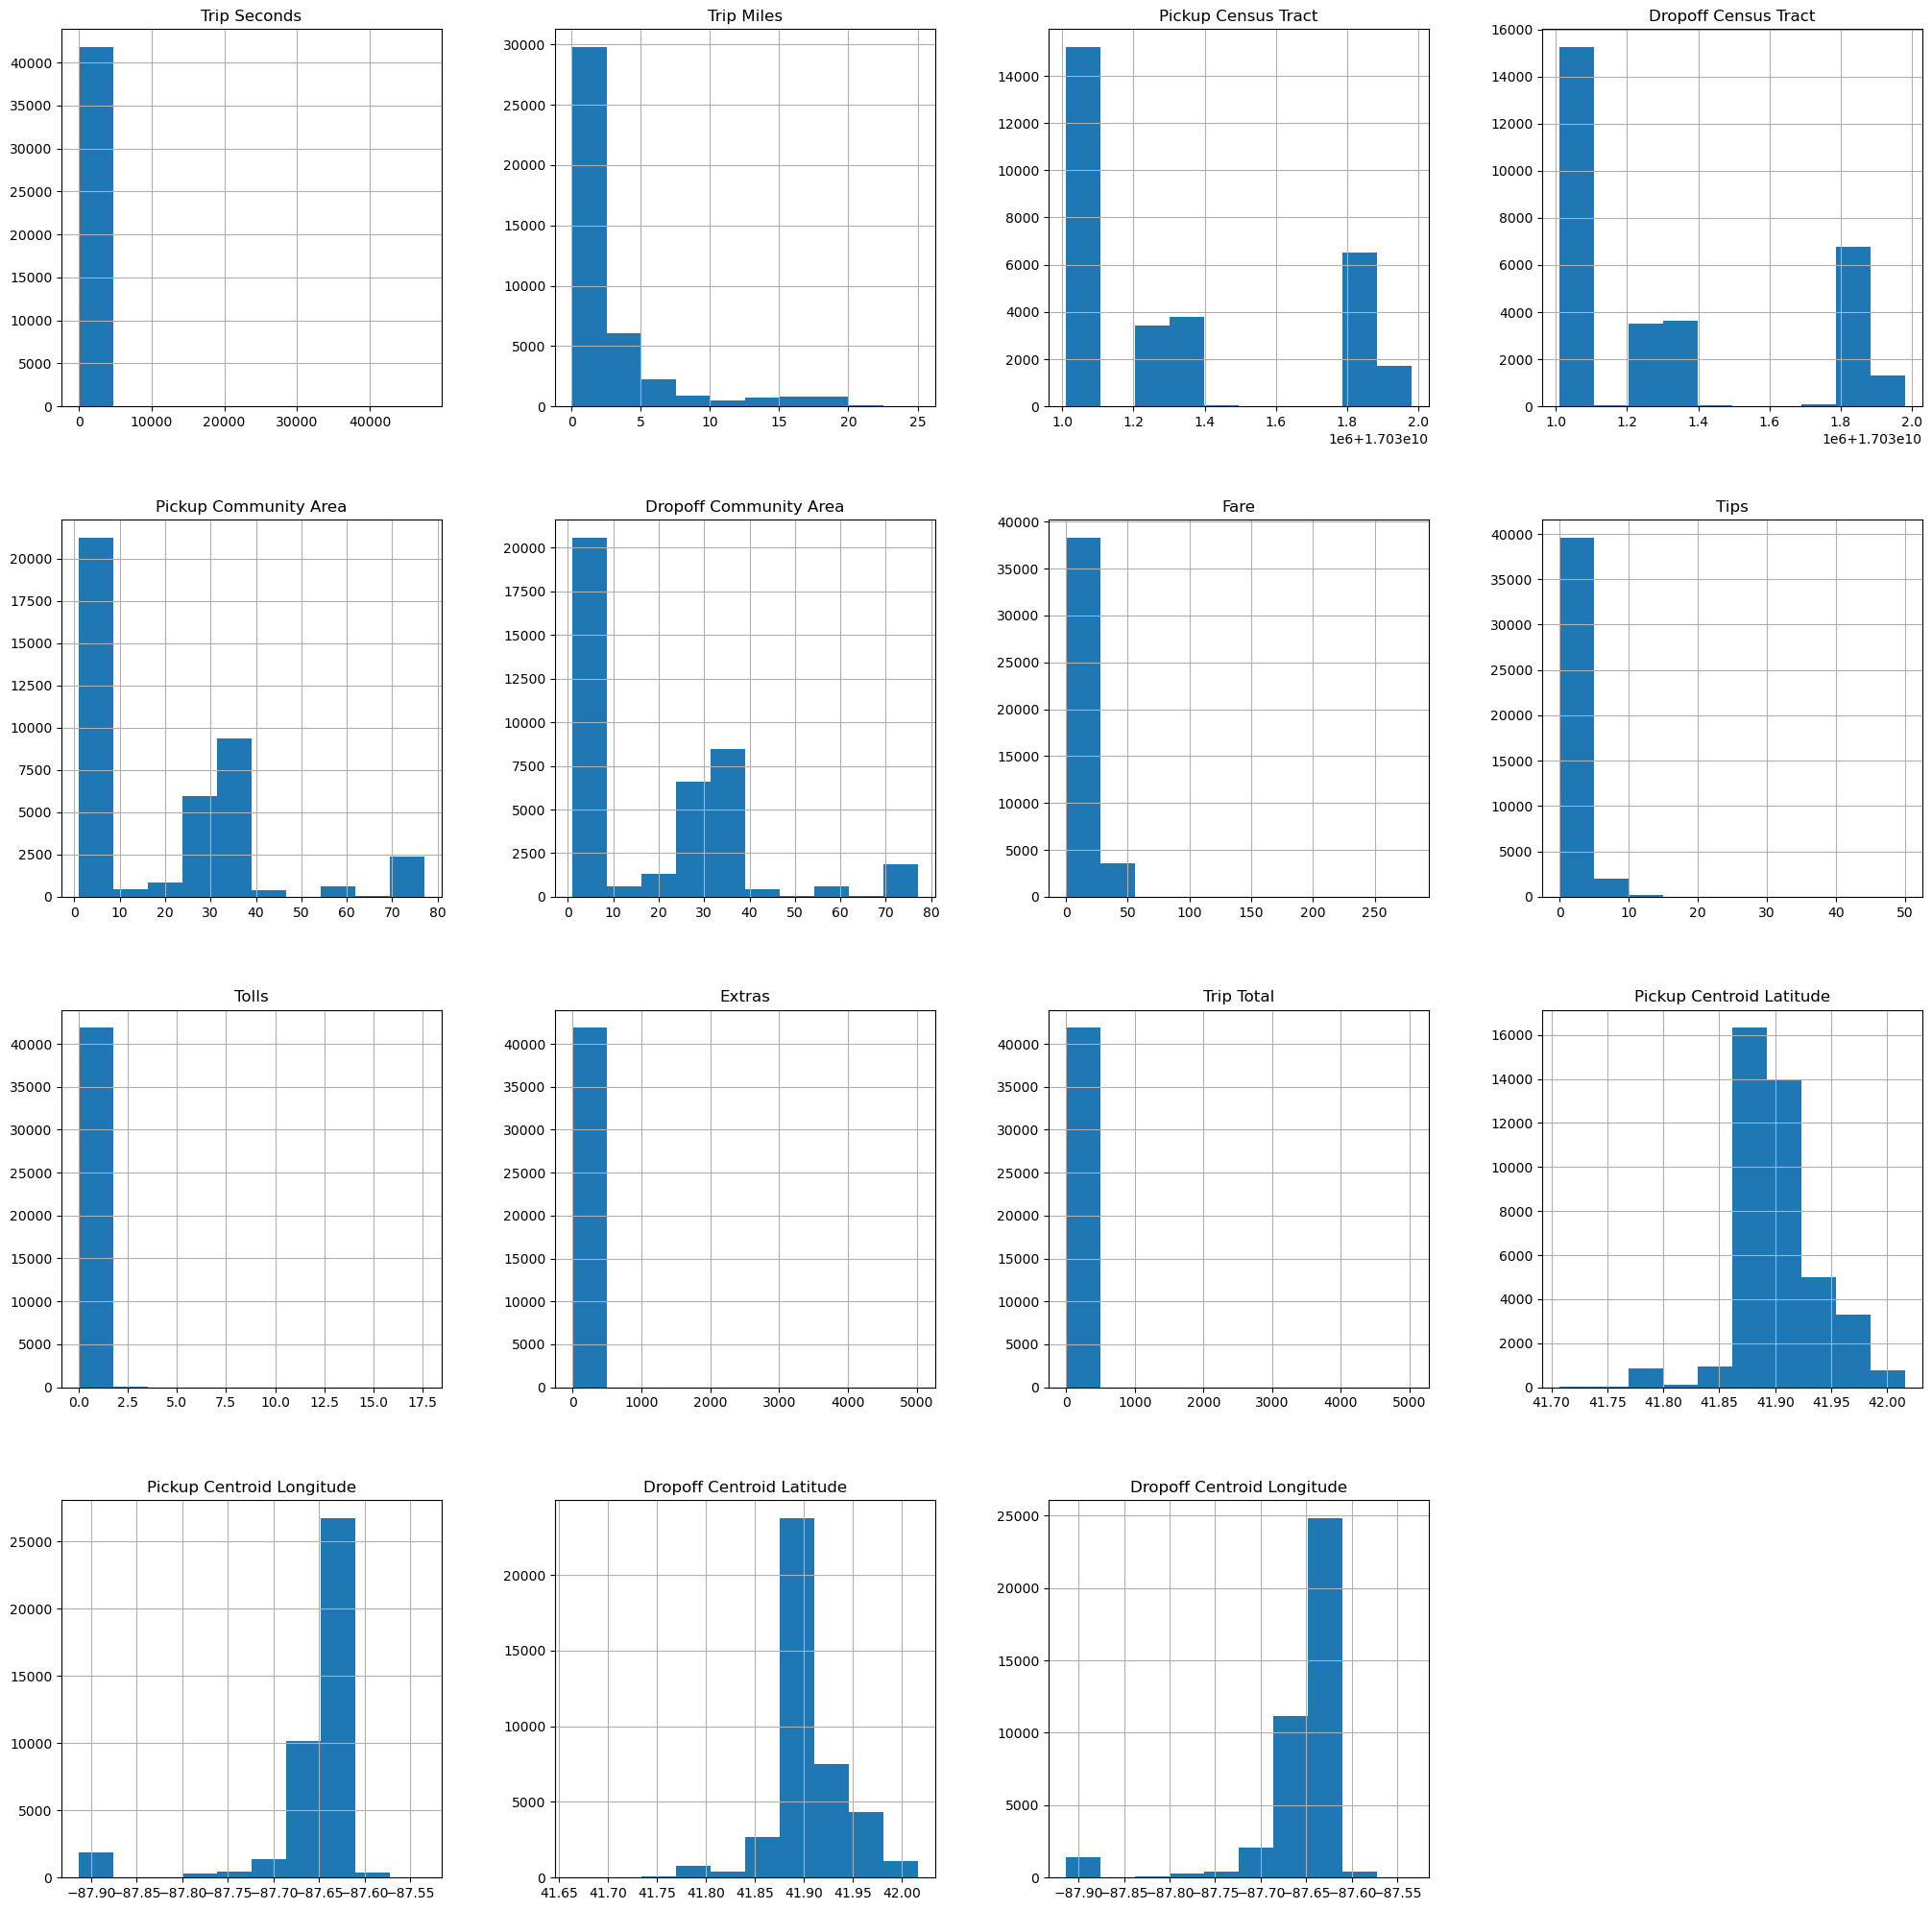

In [ ]:
# Set the figure size
fig, ax = plt.subplots(figsize=(25, 25))

# Create histograms of all features
Taxi_df.hist(ax=ax)

# Show the histograms
plt.show()

* The histograms here can give us the  information about the data's distribution and any potential problems.

* The histograms, for instance, show that some features, like the fare amount and trip distance, have a wide range of values with a few outliers on the higher end of the scale. This might point to some extreme values that should be looked into further to make sure they aren't due to data errors.


In [ ]:
Taxi_df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,41865.000000,41865.000000,3.073200e+04,3.066300e+04,41260.000000,40561.000000,41865.000000,41865.000000,41865.000000,41865.000000,41865.000000,41260.000000,41260.000000,40633.000000,40633.000000
mean,793.079183,2.816203,1.703134e+10,1.703134e+10,21.080950,20.436478,11.539132,0.958700,0.001255,0.838167,13.337255,41.903489,-87.654719,41.904079,-87.654363
std,702.375089,4.041350,3.326986e+05,3.299289e+05,18.278885,17.350122,8.810546,1.973636,0.098060,25.177468,27.282475,0.036473,0.060449,0.037825,0.054586
min,0.000000,0.060000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.707311,-87.913625,41.663671,-87.913625
25%,420.000000,0.700000,1.703108e+10,1.703108e+10,8.000000,8.000000,6.250000,0.000000,0.000000,0.000000,7.050000,41.880994,-87.655998,41.880994,-87.657233
50%,600.000000,1.300000,1.703124e+10,1.703122e+10,8.000000,8.000000,8.450000,0.000000,0.000000,0.000000,9.450000,41.893216,-87.633308,41.895033,-87.637844
75%,960.000000,3.000000,1.703183e+10,1.703183e+10,32.000000,32.000000,12.650000,2.000000,0.000000,1.000000,14.200000,41.922686,-87.626215,41.922761,-87.626659
max,47460.000000,25.000000,1.703198e+10,1.703198e+10,77.000000,77.000000,279.450000,50.000000,17.580000,5011.110000,5022.960000,42.015697,-87.534903,42.015934,-87.534903


In [ ]:
Taxi_df.dtypes

Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

In [ ]:
date_cols = ['Trip Start Timestamp', 'Trip End Timestamp']
Taxi_df[date_cols] = Taxi_df[date_cols].apply(pd.to_datetime, errors='coerce')
Taxi_df['Trip Miles'] = pd.to_numeric(Taxi_df['Trip Miles'], errors='coerce')

Now we need to convert 'Trip Start Timestamp' and 'Trip End Timestamp' to datetime format and also 'Trip Miles' to numeric format

In [ ]:
Taxi_df['Date']=pd.to_datetime(Taxi_df['Trip Start Timestamp']).dt.day
Taxi_df['Month']=pd.to_datetime(Taxi_df['Trip Start Timestamp']).dt.month
Taxi_df['Weekday'] = pd.to_datetime(Taxi_df['Trip Start Timestamp']).dt.weekday+1
Taxi_df['Hour']=pd.to_datetime(Taxi_df['Trip Start Timestamp']).dt.hour

### Checking Null Values

In [ ]:
Taxi_df.isnull().sum()

Trip ID                           0
Taxi ID                           0
Trip Start Timestamp              0
Trip End Timestamp                0
Trip Seconds                      0
Trip Miles                        0
Pickup Census Tract           11133
Dropoff Census Tract          11202
Pickup Community Area           605
Dropoff Community Area         1304
Fare                              0
Tips                              0
Tolls                             0
Extras                            0
Trip Total                        0
Payment Type                      0
Company                          76
Pickup Centroid Latitude        605
Pickup Centroid Longitude       605
Pickup Centroid Location        605
Dropoff Centroid Latitude      1232
Dropoff Centroid Longitude     1232
Dropoff Centroid  Location     1232
Date                              0
Month                             0
Weekday                           0
Hour                              0
dtype: int64

#### Percentage of Null Values

In [ ]:
# Compute the percentage of null values in each column
percent_missing = Taxi_df.isnull().sum() * 100 / len(df)

# Print the percentage of null values in each column
print(percent_missing)

Trip ID                        0.000000
Taxi ID                        0.000000
Trip Start Timestamp           0.000000
Trip End Timestamp             0.000000
Trip Seconds                   0.000000
Trip Miles                     0.000000
Pickup Census Tract           11.161686
Dropoff Census Tract          11.230863
Pickup Community Area          0.606559
Dropoff Community Area         1.307360
Fare                           0.000000
Tips                           0.000000
Tolls                          0.000000
Extras                         0.000000
Trip Total                     0.000000
Payment Type                   0.000000
Company                        0.076196
Pickup Centroid Latitude       0.606559
Pickup Centroid Longitude      0.606559
Pickup Centroid Location       0.606559
Dropoff Centroid Latitude      1.235174
Dropoff Centroid Longitude     1.235174
Dropoff Centroid  Location     1.235174
Date                           0.000000
Month                          0.000000


In [ ]:
freq=(Taxi_df.isna().sum()/len(Taxi_df))*100
freq

Trip ID                        0.000000
Taxi ID                        0.000000
Trip Start Timestamp           0.000000
Trip End Timestamp             0.000000
Trip Seconds                   0.000000
Trip Miles                     0.000000
Pickup Census Tract           26.592619
Dropoff Census Tract          26.757435
Pickup Community Area          1.445121
Dropoff Community Area         3.114774
Fare                           0.000000
Tips                           0.000000
Tolls                          0.000000
Extras                         0.000000
Trip Total                     0.000000
Payment Type                   0.000000
Company                        0.181536
Pickup Centroid Latitude       1.445121
Pickup Centroid Longitude      1.445121
Pickup Centroid Location       1.445121
Dropoff Centroid Latitude      2.942792
Dropoff Centroid Longitude     2.942792
Dropoff Centroid  Location     2.942792
Date                           0.000000
Month                          0.000000


The above result shows the percentage of null values in each column

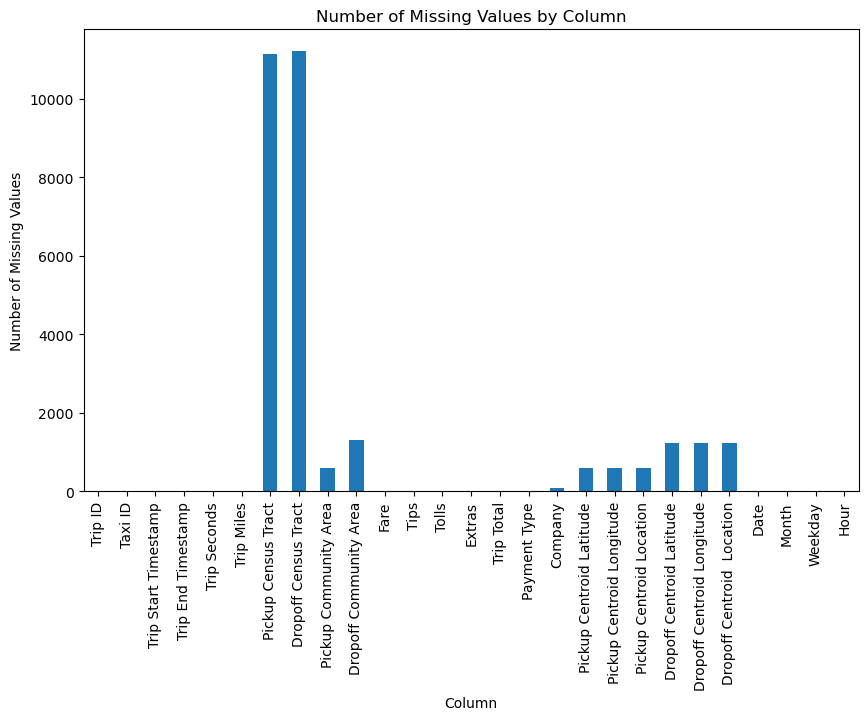

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of missing value counts by column
na_counts = Taxi_df.isna().sum()
na_counts.plot(kind='bar', figsize=(10, 6))

# Set the title and axis labels
plt.title("Number of Missing Values by Column")
plt.xlabel("Column")
plt.ylabel("Number of Missing Values")

# Display the plot
plt.show()


This is the graph which shows the number of missing values in columns, where we can see that the Pickup Census Tract and dropoff Census Tract has highest number of missing Values.

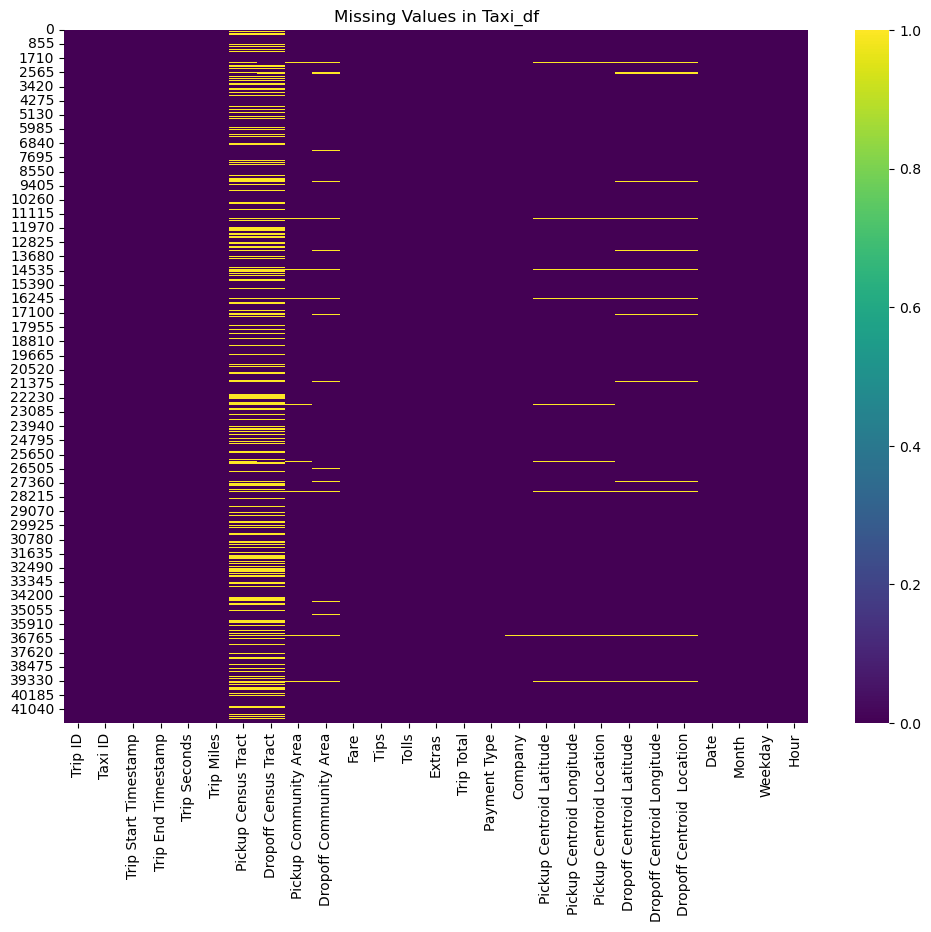

In [ ]:
# Create a heatmap of missing values in the DataFrame
plt.figure(figsize=(12,9))
sns.heatmap(Taxi_df.isnull(), cmap='viridis')

# Customize the plot
plt.title('Missing Values in Taxi_df')
plt.show()

## Exploratory Data Analysis



In [ ]:
Taxi_df['Payment Type'].unique() #Unique values of Payment Types

array(['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown'],
      dtype=object)

Payment mode has 5 attributes here, which includes- Credit Card, Cash,No Charge,Dispute,Unknown

In [ ]:
unique_payment_modes = Taxi_df['Payment Type'].unique()
print("Number of Payment Modes: ", len(unique_payment_modes))

Number of Payment Modes:  5


In [ ]:
payment_counts = Taxi_df.groupby('Payment Type').size().reset_index(name='Counts')
print(payment_counts)

  Payment Type  Counts
0         Cash   28432
1  Credit Card   12885
2      Dispute      43
3    No Charge     425
4      Unknown      80


As we can see that The cash is dominating here with the count of 28432 and followed by Credit card with 12885 ad remaining Dispute, No Charge and Unknown are very less.

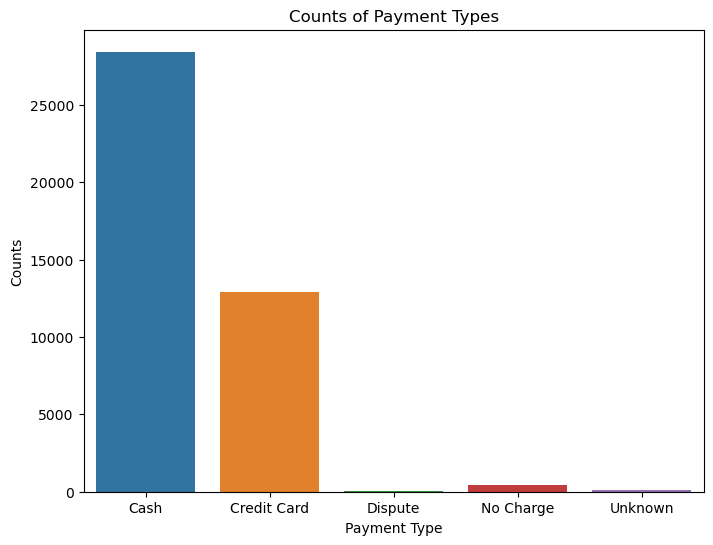

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=payment_counts['Payment Type'], y=payment_counts['Counts'])
plt.title('Counts of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Counts')
plt.show()


The plot is a bar chart showing the counts of different payment types in a dataset. The x-axis represents the payment type categories, while the y-axis represents the frequency of each payment type in the dataset. The majority of the payment types are either cash or credit card, with only a few counts for other payment types.
From this plot, we can conclude that the dataset is closed to imbalanced, with the majority of the payment types being cash and credit card. This indicates that the data is skewed towards these two payment types, and the other payment types have negligible representation. In such cases, it may be reasonable to treat the problem as a binary classification problem, Only cash and credit card payments are treated as separate classes, while all other payment types are treated as noise and eliminated.

# Reason to change the nature of classification to Binary:

As we can see that the Dispute, No Charge and Unknown are not even contributing 1% of the data, by considering it as a noise, and when we tried to train and test the model, they are creating a noise and the f-1 scores reported are 0's there which means they are minute.

![Screen%20Shot%202023-05-12%20at%201.54.49%20PM.png](attachment:Screen%20Shot%202023-05-12%20at%201.54.49%20PM.png)

As we can see that though the accuracies reported are high, the noise is impacting the macro avg and weighted avg, and even the f-1 scores are also zeroes.

In [ ]:
Taxi_df = Taxi_df[(Taxi_df['Payment Type'] != 'No Charge') & (Taxi_df['Payment Type'] != 'Dispute') & (Taxi_df['Payment Type'] != 'Unknown')]


Since the Dispute, No Charge and Unknown are not even contributing 1% of the data, by considering it as a noise, we are considering only 2 parameters Cash and Credit card and treating it as a Bianry Classification.

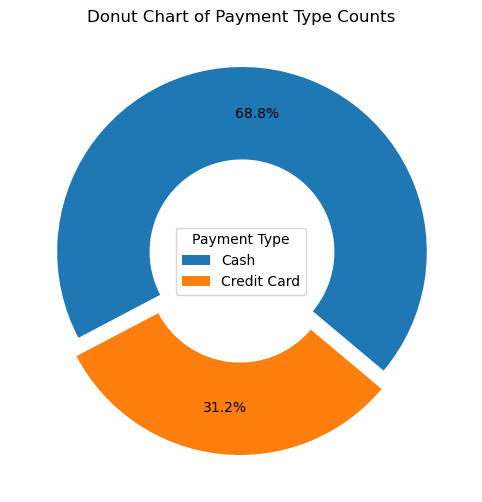

In [ ]:
# Count the number of trips for each payment type
payment_counts = Taxi_df['Payment Type'].value_counts()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8,6))
wedges, _, _ = ax.pie(payment_counts, colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd'], wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=0.75, explode=(0.05,0.05))

# Create a circle at the center of the chart to make it a donut chart
center_circle = plt.Circle((0,0), 0.4, fc='white')
fig.gca().add_artist(center_circle)

ax.set_title('Donut Chart of Payment Type Counts')
ax.legend(wedges, payment_counts.index, title='Payment Type', loc='center')

plt.show()


As we can see that the cash is contributing 68.8% and Credit card with 31.2%, the dataset is slightly close to Unbalanced.
The cash is the majority class and the Credit Card is minority class here.

In [ ]:
payment_counts = Taxi_df.groupby('Payment Type').size().reset_index(name='Counts')
print(payment_counts)

  Payment Type  Counts
0         Cash   28432
1  Credit Card   12885


In [ ]:
Taxi_df.Company.unique()

array(['Taxi Affiliation Services', 'Northwest Management LLC',
       'Top Cab Affiliation', 'Choice Taxi Association',
       'Dispatch Taxi Affiliation', 'KOAM Taxi Association',
       'Chicago Medallion Management',
       'Blue Ribbon Taxi Association Inc.', nan,
       '3011 - 66308 JBL Cab Inc.', '3623 - 72222 Arrington Enterprises',
       '5724 - 72965 KYVI Cab Inc', '1085 - N and W Cab Co',
       '5874 - Sergey Cab Corp.', '2192 - 73487 Zeymane Corp',
       '6743 - Luhak Corp', 'C & D Cab Co Inc', '6488 - 83287 Zuha Taxi',
       '3623-Arrington Enterprises', "3591- 63480 Chuk's Cab",
       '5129 - Mengisti Taxi', '5129 - 98755 Mengisti Taxi',
       '3897 - Ilie Malec', '4615 - Tyrone Henderson',
       '1408 - Donald Barnes', '4787 - 56058 Reny Cab Co',
       '3141 - Zip Cab', '5437 - Great American Cab Co',
       '2192 - Zeymane Corp', '2733 - Benny Jona',
       '1408 - 89599 Donald Barnes', "3591- Chuk's Cab",
       '5724 - KYVI Cab Inc', '3152 - 97284 Crystal Abe

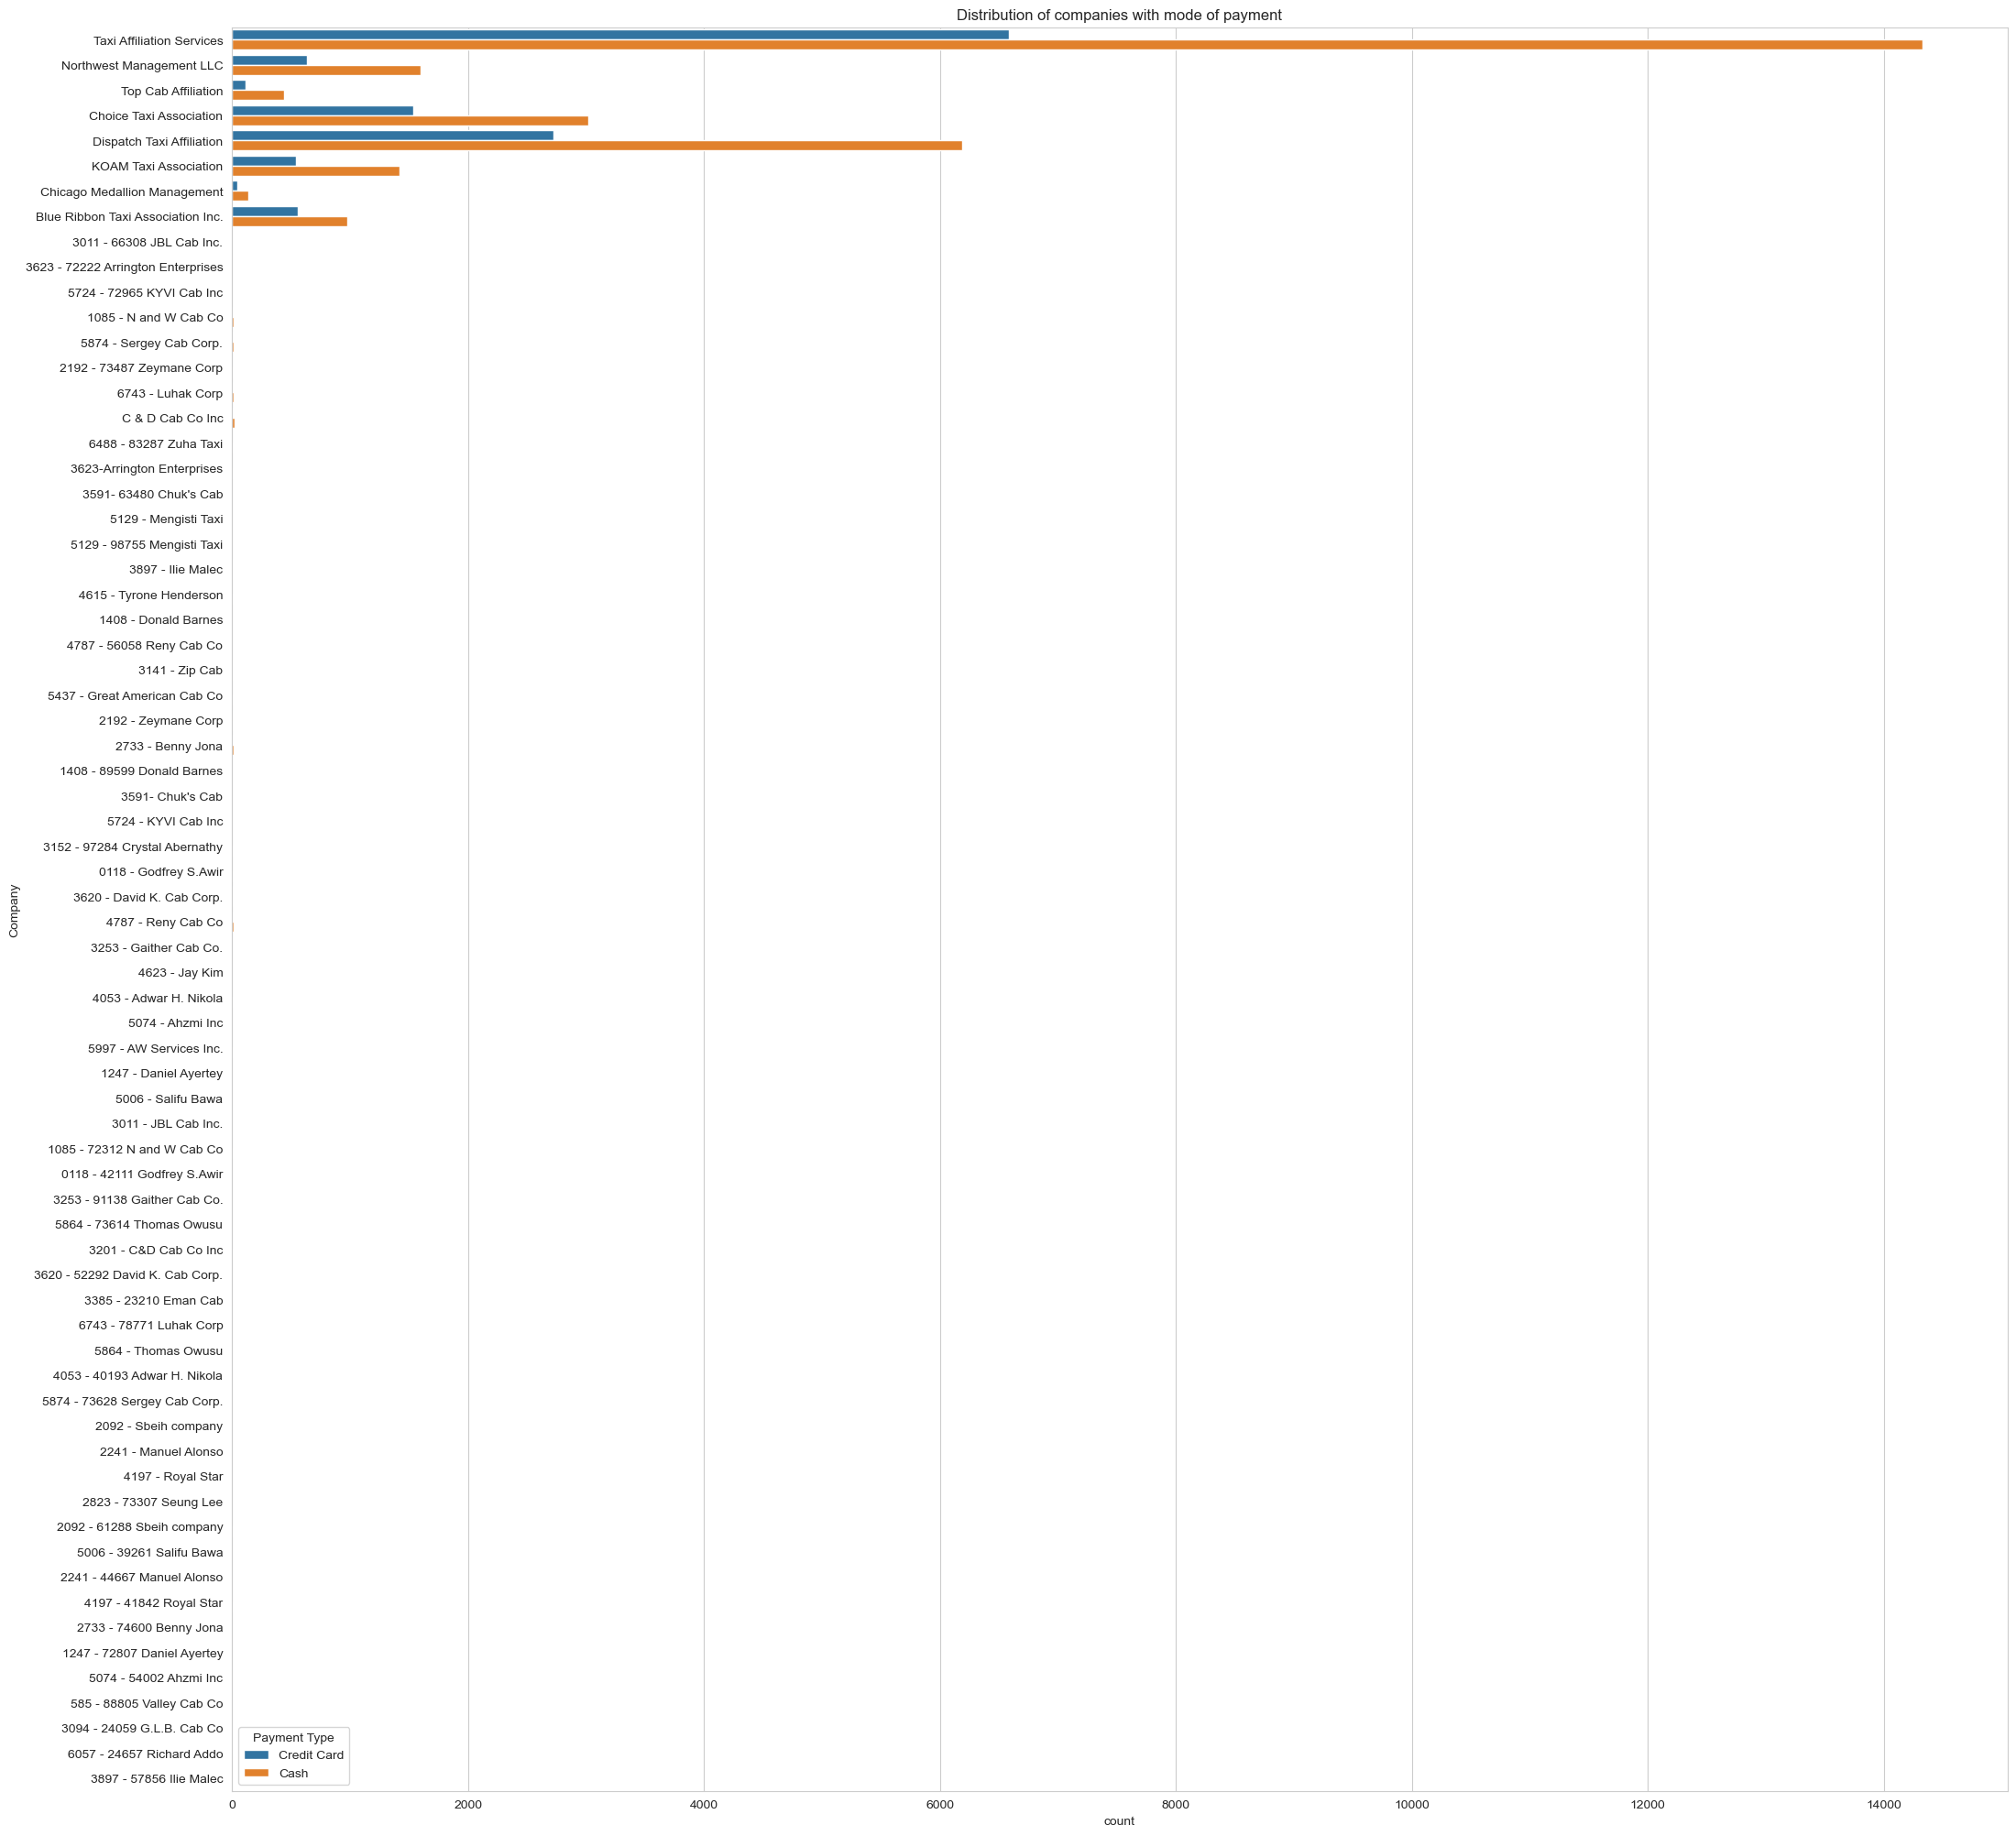

In [ ]:
plt.figure(figsize=(25,25))
sns.set_style("whitegrid")
sns.countplot(y="Company", data=Taxi_df, hue="Payment Type")
plt.title("Distribution of companies with mode of payment")
plt.show()

In [ ]:

Taxi_df.groupby(['Company', 'Payment Type']).size().sort_values(ascending= False).head(10)

Company                            Payment Type
Taxi Affiliation Services          Cash            14330
                                   Credit Card      6582
Dispatch Taxi Affiliation          Cash             6190
Choice Taxi Association            Cash             3024
Dispatch Taxi Affiliation          Credit Card      2722
Northwest Management LLC           Cash             1597
Choice Taxi Association            Credit Card      1539
KOAM Taxi Association              Cash             1420
Blue Ribbon Taxi Association Inc.  Cash              981
Northwest Management LLC           Credit Card       640
dtype: int64

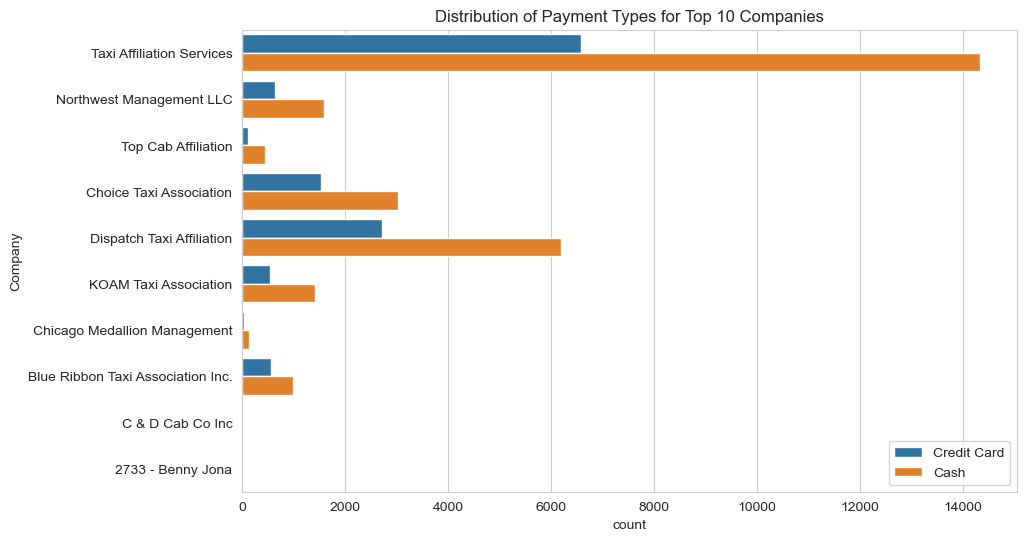

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 companies by count
top_companies = Taxi_df['Company'].value_counts().nlargest(10).index.tolist()

# Filter the data to only include the top 10 companies
filtered_data = Taxi_df[Taxi_df['Company'].isin(top_companies)]

# Define custom colors for the bars
colors = ['#1f77b4', '#ff7f0e']

# Plot the distribution of payment types for the top 10 companies
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.countplot(y="Company", data=filtered_data, hue="Payment Type", palette=colors)

# Move the legend to the top-right corner
ax.legend(loc='lower right')

plt.title("Distribution of Payment Types for Top 10 Companies")
plt.show()


These are the top 10 companies based on distribution of our target variable i.e. payment Type and we can see that In these top 10 companies Taxi Affiliation services is having highest distribution among Cash and Credit card, where as Chicago Medallion Management has bit lower distribution among the top 10.

* Based on the report, it is observed that the majority of the transactions were made through cash payment mode, with Taxi Affiliation Services being the top company with the highest number of cash payments (26,588). Credit card payments were also quite popular, with the same company, Taxi Affiliation Services, having the highest number of transactions (11,190) in this mode of payment.

* Dispatch Taxi Affiliation and Blue Ribbon Taxi Association Inc. were the second and third companies with the highest number of transactions in cash payment mode, respectively. Chicago Elite Cab Corp. and Blue Ribbon Taxi Association Inc. had the highest number of credit card payments after Taxi Affiliation Services. Northwest Management LLC and Choice Taxi Association had relatively fewer transactions in both cash and credit card payment modes.

* Overall, it appears that cash payment mode is still quite popular among taxi customers, but credit card payments are also gaining popularity. The report suggests that companies need to provide both payment options to their customers to ensure a seamless and convenient experience.

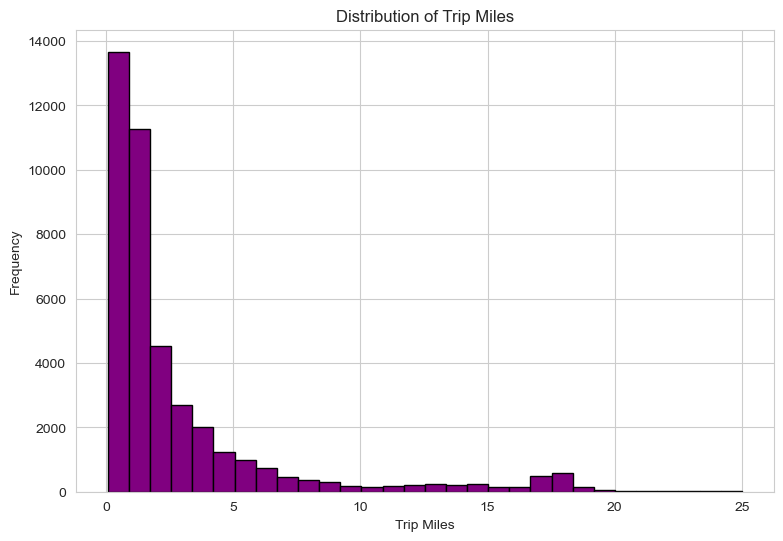

In [ ]:
plt.figure(figsize=(9,6))
plt.hist(Taxi_df['Trip Miles'], bins=30, color='purple', edgecolor='black')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Miles')
plt.show()


The graph describes the Trip miles and frequency of trips occured at that range of miles.
* We can see that most of the trips are happened at 0-5 miles, that means most of the Journeys are short.

* We can see that at the range of 20-25 miles, there are no trips recorded, which means all the drivers are comfortable with short trips only and the passengers who looks to travel for longer distances like 20-25 miles donot rely on Taxi as there were very les or no trips detected at larger miles.

In [ ]:
Taxi_df['Trip Miles'].value_counts()

0.10     3936
1.00     1771
0.80     1751
0.20     1676
0.90     1629
         ... 
22.30       1
0.14        1
21.30       1
19.90       1
23.50       1
Name: Trip Miles, Length: 245, dtype: int64

In [ ]:
Taxi_df[Taxi_df['Trip Miles'] == 0.0]['Company'].value_counts()

Series([], Name: Company, dtype: int64)

### Which company earned more?

In [ ]:
annual_revenues = Taxi_df[['Trip Total', 'Company']].groupby('Company').sum()
annual_revenues.sort_values(by='Trip Total', inplace=True, ascending=False)
annual_revenues

,Trip Total
Company,
Taxi Affiliation Services,306078.31
Dispatch Taxi Affiliation,100538.40
Choice Taxi Association,53893.37
Blue Ribbon Taxi Association Inc.,26584.84
Northwest Management LLC,25141.84
...,...
6057 - 24657 Richard Addo,7.25
4197 - Royal Star,7.25
4053 - 40193 Adwar H. Nikola,6.75


In [ ]:
annual_revenues = Taxi_df[['Trip Total', 'Company']].groupby('Company').sum()
annual_revenues.sort_values(by='Trip Total', inplace=True, ascending=False)
annual_revenues_df = annual_revenues.reset_index()
print(annual_revenues_df)

                              Company  Trip Total
0           Taxi Affiliation Services   306078.31
1           Dispatch Taxi Affiliation   100538.40
2             Choice Taxi Association    53893.37
3   Blue Ribbon Taxi Association Inc.    26584.84
4            Northwest Management LLC    25141.84
..                                ...         ...
65          6057 - 24657 Richard Addo        7.25
66                  4197 - Royal Star        7.25
67       4053 - 40193 Adwar H. Nikola        6.75
68                3011 - JBL Cab Inc.        5.85
69             5074 - 54002 Ahzmi Inc        5.65

[70 rows x 2 columns]


In [ ]:
annual_revenues = Taxi_df[['Trip Total', 'Company']].groupby('Company').sum()
annual_revenues.sort_values(by='Trip Total', inplace=True, ascending=False)

styled_df = annual_revenues.style.background_gradient(cmap='Blues')
styled_df.set_caption("Annual Revenues by Company")
styled_df.set_properties(**{'text-align': 'center'})

styled_df


,Trip Total
Company,
Taxi Affiliation Services,306078.310000
Dispatch Taxi Affiliation,100538.400000
Choice Taxi Association,53893.370000
Blue Ribbon Taxi Association Inc.,26584.840000
Northwest Management LLC,25141.840000
KOAM Taxi Association,24743.870000
Top Cab Affiliation,7291.000000
Chicago Medallion Management,2154.650000
2733 - Benny Jona,296.000000


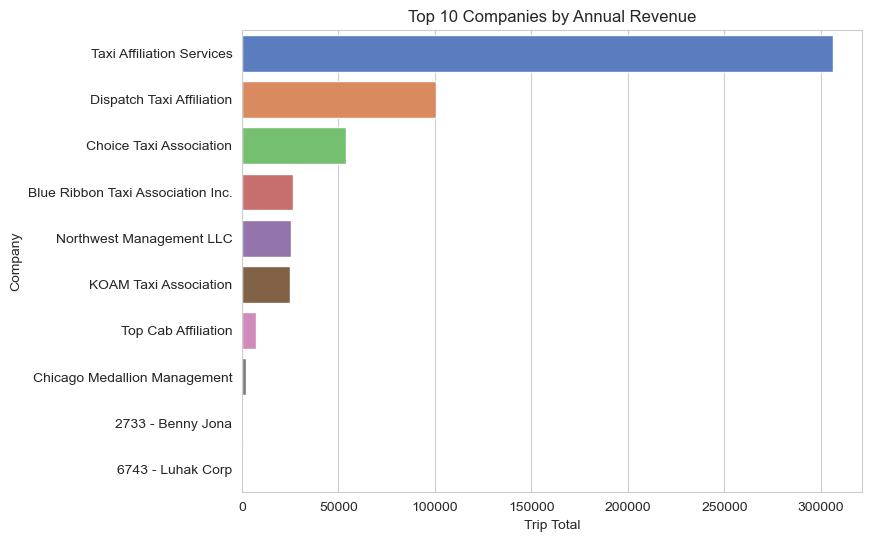

In [ ]:
import seaborn as sns

top_revenues = annual_revenues[:10]  # select top 10 companies by revenue
plt.figure(figsize=(8, 6))
sns.barplot(x='Trip Total', y=top_revenues.index, data=top_revenues, palette='muted')
plt.xlabel('Trip Total')
plt.ylabel('Company')
plt.title('Top 10 Companies by Annual Revenue')
plt.show()


We can see that the Taxi Affiliation Services company has highest annual revenue compared to others, this is due to they have more drivers who accept either cash or card and they may have good reviews and that might be the reason they are providing many trips and generating good amount of revenue.

### Distribution of Trips by date

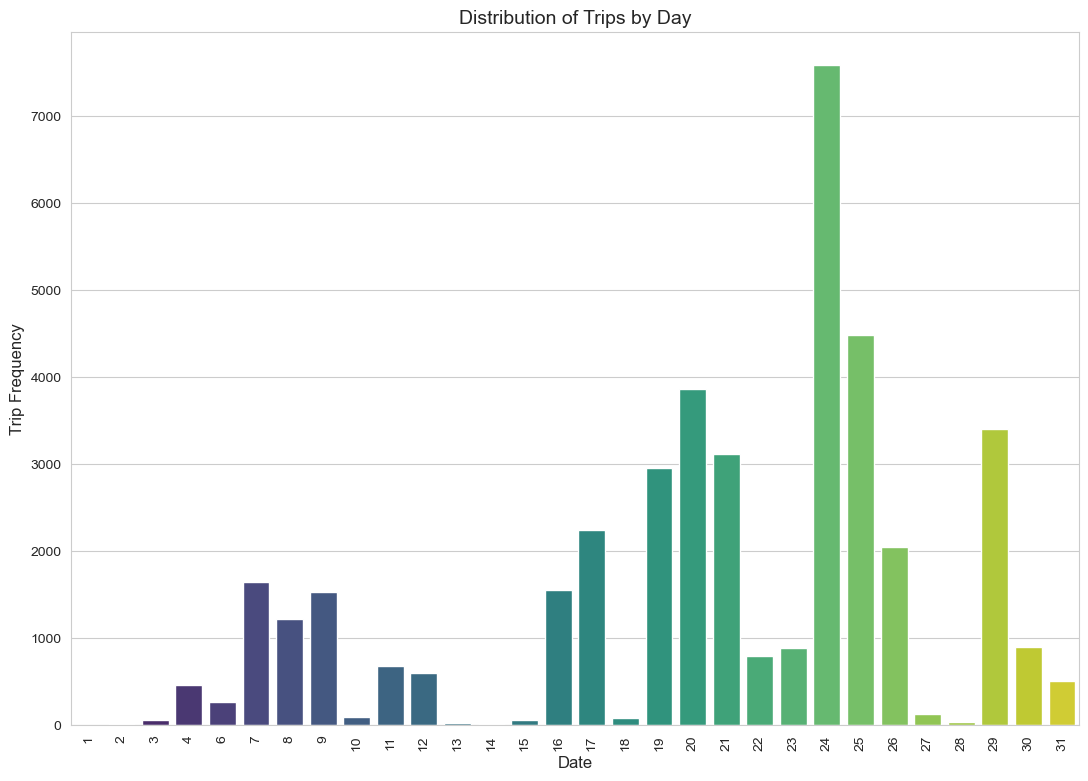

In [ ]:

plt.figure(figsize=(13, 9))
sns.set_style("whitegrid")
sns.countplot(x="Date", data=Taxi_df, palette="viridis")
plt.title("Distribution of Trips by Day", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Trip Frequency", fontsize=12)
plt.xticks(rotation=90)
plt.show()

* Based on the plot, it can be observed that the highest number of trips were recorded on the 24th day of the month, followed by the 25th day. The frequency of trips on these two days is significantly higher than that of the other days in the month. This could be due to various factors such as weekends, public holidays, or any events happening on those days that led to increased taxi usage.

### Distribution of Trips by hour

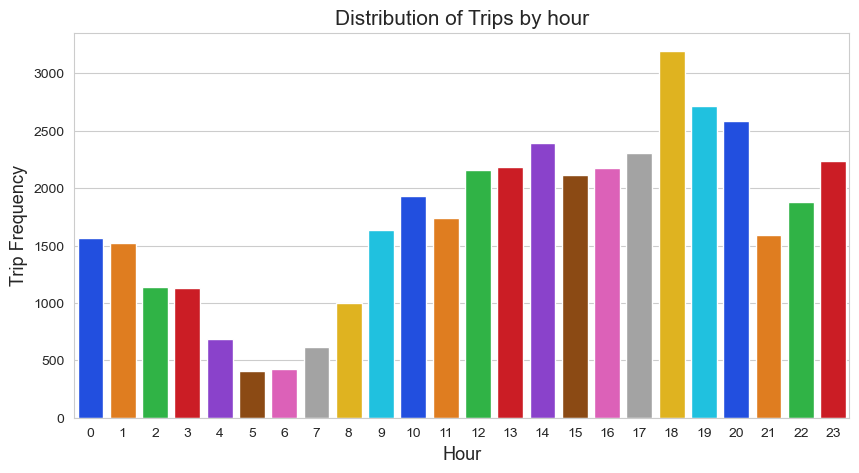

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(x="Hour",data=Taxi_df, palette="bright")
plt.title('Distribution of Trips by hour', fontsize=15)
plt.xlabel("Hour",fontsize=13)
plt.ylabel("Trip Frequency", fontsize=13)
plt.show()


* The highest frequency of trips is observed during the 18th hour, which is the evening time. This is followed by the 19th and 20th hours. This could be because most people finish their work during the late afternoon and begin their commute back home, resulting in higher demand for taxi services during this time. It is also possible that there are more events or activities happening during the evening time, which increases the demand for taxi services.


### Distribution of Trips by Days

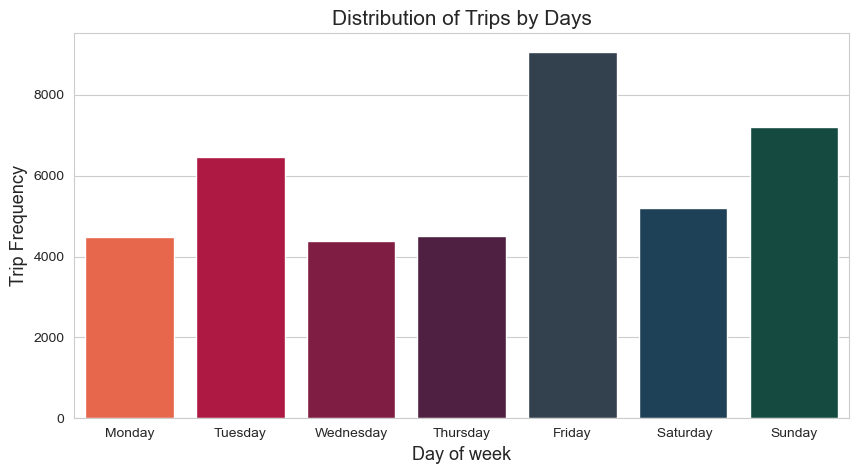

In [ ]:

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
colors = ["#FF5733", "#C70039", "#900C3F", "#581845", "#2E4053", "#154360", "#0B5345"]
fig=sns.countplot(x="Weekday",data=Taxi_df, palette=colors)
plt.title('Distribution of Trips by Days', fontsize=15)
plt.xlabel("Day of week",fontsize=13)
plt.ylabel("Trip Frequency", fontsize=13)
labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
fig.set_xticklabels(labels)
plt.show()


* The distribution of taxi trips by weekday, with Friday having the highest frequency of trips at 9060, followed by Sunday at 7203 and Tuesday at 6449. Saturday had a lower frequency of trips at 5195, while Thursday, Monday, and Wednesday had even lower frequencies of 4510, 4480, and 4384, respectively.


### Distribution of trip fare

In [ ]:
fare_stats = Taxi_df['Fare'].describe()[['min', 'max']]
fare_stats.rename(index={'min': 'Minimum fare', 'max': 'Maximum fare'}, inplace=True)
print(fare_stats)


Minimum fare      0.00
Maximum fare    279.45
Name: Fare, dtype: float64


As we can see that the Minimum fare is 0 and maximum fare of the Taxi trips is 279.45

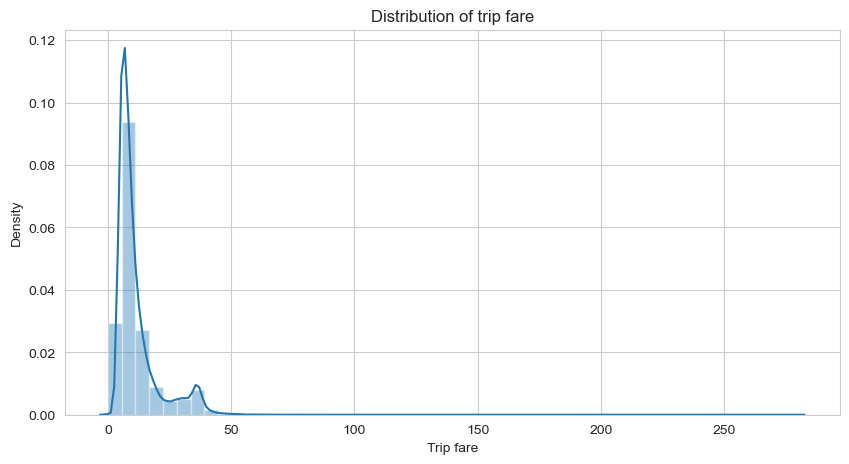

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(Taxi_df["Fare"])
plt.title("Distribution of trip fare")
plt.xlabel("Trip fare")
plt.ylabel("Density")
plt.show()

* So, by this plot we can see that the highest distribution of fare is occured between 0 and 50-55, that means the most number of trip's fare is in the range of 0-55, which is comparatively low and this also justifies the assumption that we have made in the previous plot i.e. Most of the Journeys are short.

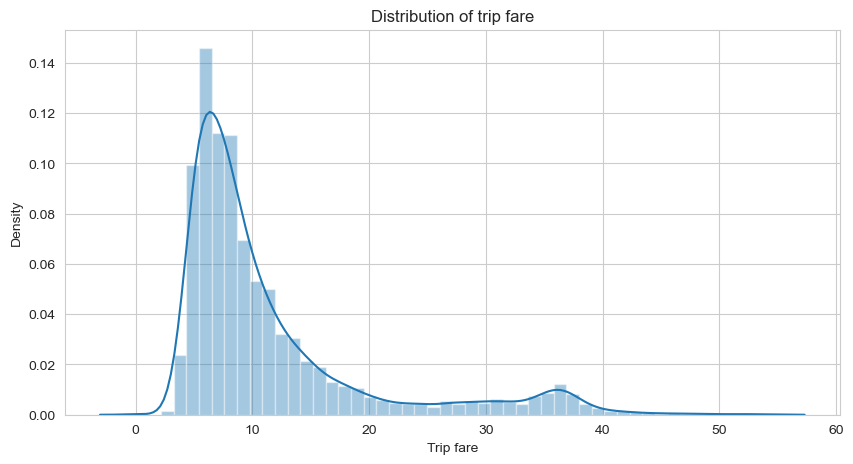

In [ ]:
Taxi_df = Taxi_df[Taxi_df["Fare"]<=55]
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(Taxi_df["Fare"])
plt.title("Distribution of trip fare")
plt.xlabel("Trip fare")
plt.ylabel("Density")
plt.show()

* So, when we again plot the graph by considering the region that is between 0-55, We could see that the ideal fare is around 8 dollars.

In [ ]:
print("Pickup longitude range: ", Taxi_df['Pickup Centroid Longitude'].describe()[['min', 'max']].values)
print("Pickup latitude range: ", Taxi_df['Pickup Centroid Latitude'].describe()[['min', 'max']].values)
print("Dropoff longitude range: ", Taxi_df['Dropoff Centroid Longitude'].describe()[['min', 'max']].values)
print("Dropoff latitude range: ", Taxi_df['Dropoff Centroid Latitude'].describe()[['min', 'max']].values)


Pickup longitude range:  [-87.9136246 -87.5349029]
Pickup latitude range:  [41.70731145 42.01569675]
Dropoff longitude range:  [-87.9136246 -87.5349029]
Dropoff latitude range:  [41.66367065 42.01593438]


### Pickup coordinates

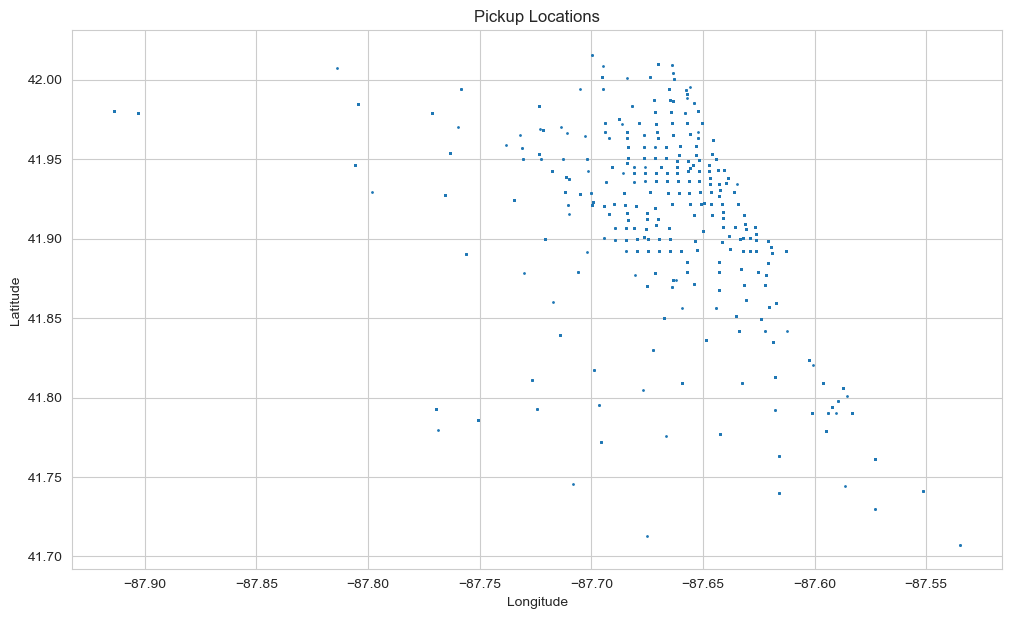

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(x=Taxi_df['Pickup Centroid Longitude'], y=Taxi_df['Pickup Centroid Latitude'], s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup Locations')
plt.show()


* This plot represents the Pickup co-ordinates based on the lattitude and longitude co-ordinates provided

### Dropoff coordinates

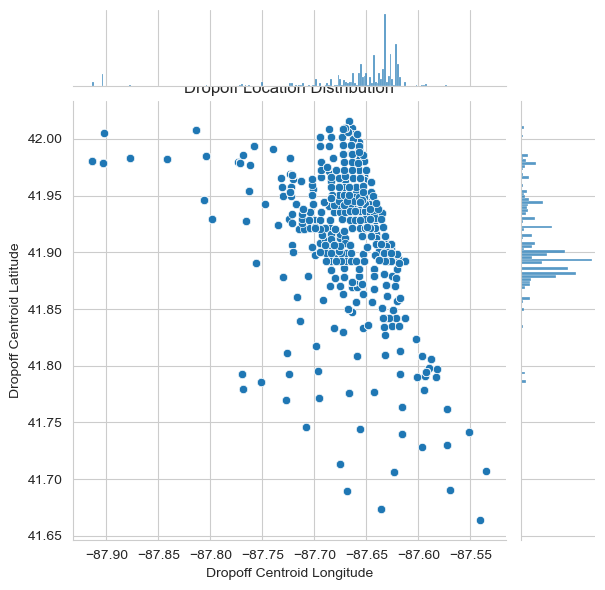

In [ ]:

# create custom color palette
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

# plot jointplot with custom color palette
sns.jointplot(y="Dropoff Centroid Latitude", x="Dropoff Centroid Longitude", data=Taxi_df, palette=custom_palette)

# set title and show plot
plt.title("Dropoff Location Distribution")
plt.show()

* This plot represents the drop-off co-ordinates based on the lattitude and longitude co-ordinates provided

### Pickup community area

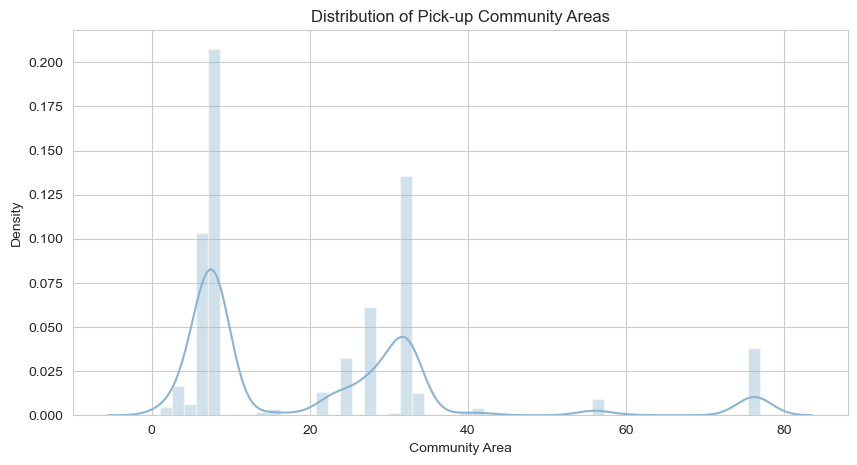

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.set_palette("PuBuGn_d")
sns.distplot(Taxi_df["Pickup Community Area"])
plt.title("Distribution of Pick-up Community Areas")
plt.xlabel("Community Area")
plt.ylabel("Density")
plt.show()


The above plot and below plot represents the Distribution of community Areas

### Dropoff community area

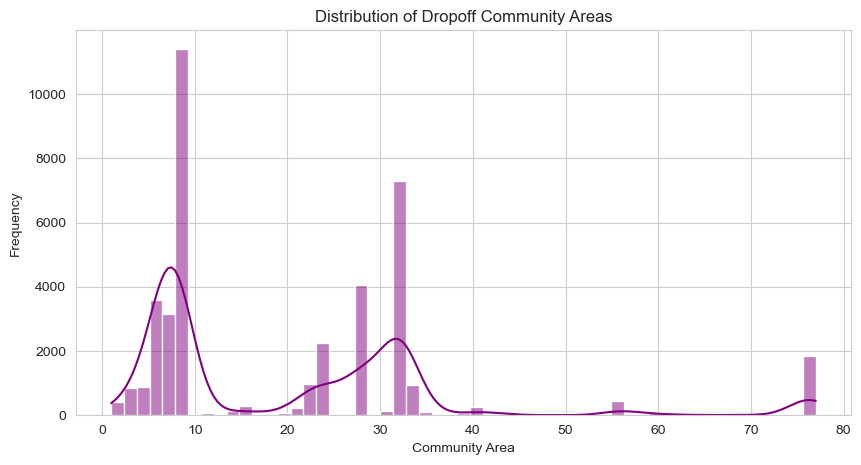

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.histplot(x="Dropoff Community Area", data=Taxi_df, kde=True, color="purple")
plt.title("Distribution of Dropoff Community Areas")
plt.xlabel("Community Area")
plt.ylabel("Frequency")
plt.show()


# Top 10 Community codes with Cash

In [ ]:
cash_areas = Taxi_df[Taxi_df['Payment Type'] == 'Cash']

# Print the top 10 Pickup Community Areas
print('Top 10 Pickup Community Areas that accept cash:')
print(cash_areas['Pickup Community Area'].value_counts().head(10))

# Print the top 10 Dropoff Community Areas
print('Top 10 Dropoff Community Areas that accept cash:')
print(cash_areas['Dropoff Community Area'].value_counts().head(10))

Top 10 Pickup Community Areas that accept cash:
8.0     8952
32.0    5796
28.0    2740
6.0     2409
7.0     1957
24.0    1494
76.0     839
3.0      579
33.0     493
22.0     477
Name: Pickup Community Area, dtype: int64
Top 10 Dropoff Community Areas that accept cash:
8.0     8149
32.0    5165
28.0    2904
6.0     2280
7.0     2094
24.0    1556
76.0     625
22.0     617
3.0      593
33.0     560
Name: Dropoff Community Area, dtype: int64


In [ ]:
# Filter the data to include only credit card payments
credit_areas = Taxi_df[Taxi_df['Payment Type'] == 'Credit Card']

# Print the top 10 Pickup Community Areas
print('Top 10 Pickup Community Areas that accept credit card:')
print(credit_areas['Pickup Community Area'].value_counts().head(10))

# Print the top 10 Dropoff Community Areas
print('Top 10 Dropoff Community Areas that accept credit card:')
print(credit_areas['Dropoff Community Area'].value_counts().head(10))


Top 10 Pickup Community Areas that accept credit card:
8.0     3896
32.0    2589
6.0     1106
28.0    1043
76.0    1001
7.0      907
24.0     502
56.0     335
33.0     237
3.0      217
Name: Pickup Community Area, dtype: int64
Top 10 Dropoff Community Areas that accept credit card:
8.0     3252
32.0    2139
6.0     1309
28.0    1150
7.0     1052
24.0     693
76.0     678
22.0     294
33.0     280
3.0      261
Name: Dropoff Community Area, dtype: int64


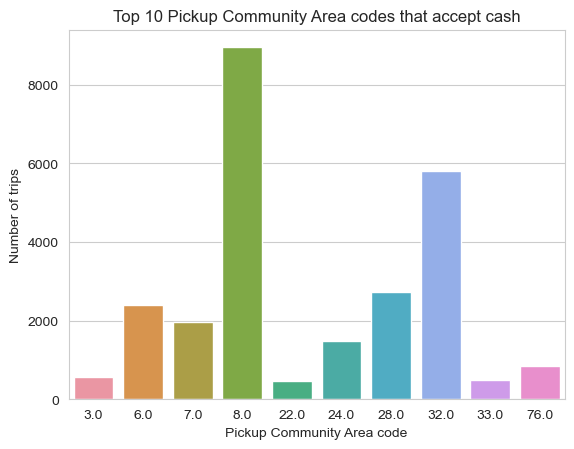

In [ ]:
pickup_areas = cash_areas['Pickup Community Area'].value_counts().head(10)
sns.barplot(x=pickup_areas.index, y=pickup_areas.values)

# Add labels and title
plt.xlabel('Pickup Community Area code')
plt.ylabel('Number of trips')
plt.title('Top 10 Pickup Community Area codes that accept cash')

# Show the plot
plt.show()

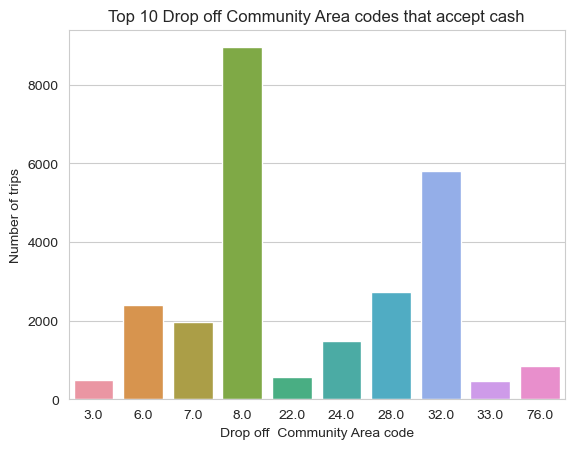

In [ ]:
dropoff_areas = cash_areas['Dropoff Community Area'].value_counts().head(10)
sns.barplot(x=dropoff_areas.index, y=pickup_areas.values)

# Add labels and title
plt.xlabel('Drop off  Community Area code')
plt.ylabel('Number of trips')
plt.title('Top 10 Drop off Community Area codes that accept cash')

# Show the plot
plt.show()

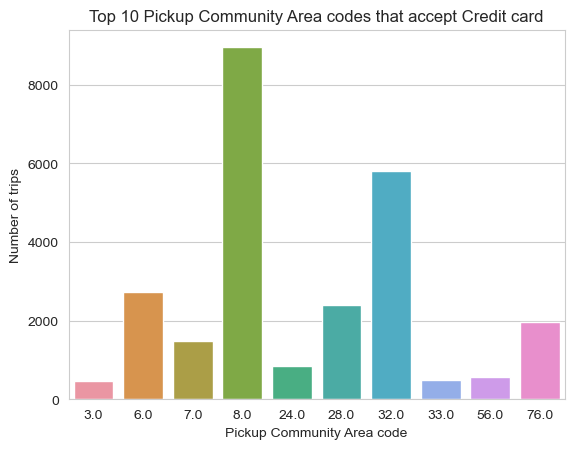

In [ ]:
pickup_areas_credit = credit_areas['Pickup Community Area'].value_counts().head(10)
sns.barplot(x=pickup_areas_credit.index, y=pickup_areas.values)

# Add labels and title
plt.xlabel('Pickup Community Area code')
plt.ylabel('Number of trips')
plt.title('Top 10 Pickup Community Area codes that accept Credit card')

# Show the plot
plt.show()

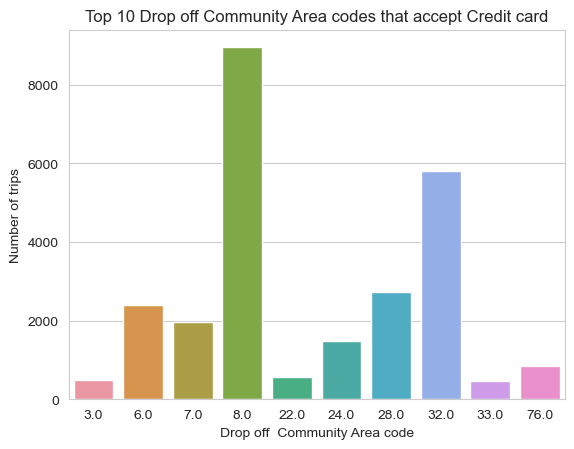

In [ ]:
dropoff_areas_credit = credit_areas['Dropoff Community Area'].value_counts().head(10)
sns.barplot(x=dropoff_areas.index, y=pickup_areas.values)

# Add labels and title
plt.xlabel('Drop off  Community Area code')
plt.ylabel('Number of trips')
plt.title('Top 10 Drop off Community Area codes that accept Credit card')

# Show the plot
plt.show()

So, by Interpreting the results,
* We can say that, the area code 8.0 is having highest number of trips with cash and credit card, so the comapnies can send the drivers who accept both cash and credit to that areas.

* 33.0 is the division of area code which has less number of trips with cash, so the companies should send the drivers who accept the credit there.

* 3.0 is the are which has less number of trips with credit, that means the drivers who accept the cash need to go there.

# Machine Learning Modeling

# Feature Selection

This is the 1st step that we have performed to know which feature has highest importance and then thought to focuss on that features only.

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
new_df=Taxi_df.drop(["Trip ID","Taxi ID","Pickup Census Tract","Dropoff Census Tract",
                              "Trip Start Timestamp","Trip End Timestamp",
                              "Pickup Centroid Longitude", "Pickup Centroid Location",
       "Dropoff Centroid Latitude", "Dropoff Centroid Longitude",
       "Dropoff Centroid  Location","Pickup Centroid Latitude"],axis=1)

We have dropped the unwanted columns which is not used for further analysis

In [ ]:
new_df = new_df.dropna()

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39835 entries, 0 to 41864
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip Seconds            39835 non-null  float64
 1   Trip Miles              39835 non-null  float64
 2   Pickup Community Area   39835 non-null  float64
 3   Dropoff Community Area  39835 non-null  float64
 4   Fare                    39835 non-null  float64
 5   Tips                    39835 non-null  float64
 6   Tolls                   39835 non-null  float64
 7   Extras                  39835 non-null  float64
 8   Trip Total              39835 non-null  float64
 9   Payment Type            39835 non-null  object 
 10  Company                 39835 non-null  object 
 11  Date                    39835 non-null  int64  
 12  Month                   39835 non-null  int64  
 13  Weekday                 39835 non-null  int64  
 14  Hour                    39835 non-null

Basically the above result shows us the columns which might be useful for further analysis.

Then as the Payment Type and Company has object type, we have encoded the both variables.

In [ ]:
categorical_features=['Payment Type', 'Company']
encoder=LabelEncoder()
new_df[categorical_features] = new_df[categorical_features].apply(encoder.fit_transform)

In [ ]:
# Define the features and target variables
X = new_df.drop("Payment Type",axis=1)
y = new_df['Payment Type']

In [ ]:
new_df.columns

Index(['Trip Seconds', 'Trip Miles', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Date', 'Month', 'Weekday',
       'Hour'],
      dtype='object')

need to check

In [ ]:
new_df = new_df.drop("Payment Type",axis=1)
new_df = new_df.drop("Company",axis=1)
new_df["Payment Type"]=y

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39835 entries, 0 to 41864
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip Seconds            39835 non-null  float64
 1   Trip Miles              39835 non-null  float64
 2   Pickup Community Area   39835 non-null  float64
 3   Dropoff Community Area  39835 non-null  float64
 4   Fare                    39835 non-null  float64
 5   Tips                    39835 non-null  float64
 6   Tolls                   39835 non-null  float64
 7   Extras                  39835 non-null  float64
 8   Trip Total              39835 non-null  float64
 9   Date                    39835 non-null  int64  
 10  Month                   39835 non-null  int64  
 11  Weekday                 39835 non-null  int64  
 12  Hour                    39835 non-null  int64  
 13  Payment Type            39835 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 

In [ ]:
#Step-1:  Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X = new_df.iloc[:, :-1].values
y = new_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=3)
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2, random_state=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=3)

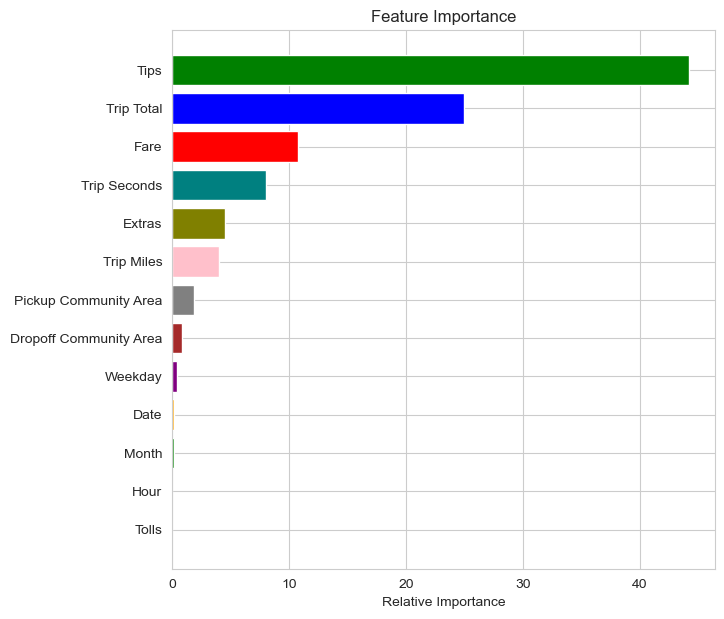

In [ ]:
import numpy as np

feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
# Displaying the relative feature importance by a horizontal bar chart
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'pink', 'olive', 'teal']
plt.figure(figsize=(7, 7))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color=colors, align="center")
plt.yticks(pos, new_df.columns[:-1][sorted_idx])
plt.show()

* Here after performing the feature Importance we considered top-7 features which are Tips, Trip Total, Fare, Trip Seconds, Extras, Trip Miles and Pickup Community area. Performed further Analysis.

In [ ]:
#X=new_df["Tips","Trip Total","Fare","Trip Seconds","Extras","Trip Miles"]
X = new_df[["Tips","Trip Total","Fare","Trip Seconds","Extras","Trip Miles"]].to_numpy()

In [ ]:
# Breaking the data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)

# Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', random_state=1, max_iter=1000,multi_class='auto') # Instantiate

In [ ]:
# train the model
logreg.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000, random_state=1)

In [ ]:
y_train_pred_prob = logreg.predict_proba(X_train)
# Calculating probabilities␣↪→of the two classes in train subset
y_test_pred_prob = logreg.predict_proba(X_test) # Calculating probabilities␣↪→of the two classes in test subset
# Presenting the probabilities for the 1st 10 instances in train subset
print('Train predictions for probabilities:\n\n', y_train_pred_prob[:10],'\n')
# Presenting the probabilities for the 1st 10 instances in test subset
print('Test predictions for probabilities:\n\n', y_test_pred_prob[:10])

Train predictions for probabilities:

 [[9.85083442e-01 1.49165581e-02]
 [2.32919503e-08 9.99999977e-01]
 [1.09891743e-06 9.99998901e-01]
 [2.69379419e-01 7.30620581e-01]
 [1.10120318e-01 8.89879682e-01]
 [9.64788619e-01 3.52113806e-02]
 [9.69281339e-01 3.07186611e-02]
 [9.63619362e-01 3.63806380e-02]
 [3.72812892e-13 1.00000000e+00]
 [5.50010048e-03 9.94499900e-01]] 

Test predictions for probabilities:

 [[9.71593153e-01 2.84068472e-02]
 [9.70400863e-01 2.95991367e-02]
 [9.60194822e-01 3.98051777e-02]
 [6.79163788e-06 9.99993208e-01]
 [9.65584170e-01 3.44158295e-02]
 [9.63135269e-01 3.68647306e-02]
 [9.64386273e-01 3.56137271e-02]
 [7.10058143e-02 9.28994186e-01]
 [4.31133744e-02 9.56886626e-01]
 [9.68933651e-01 3.10663492e-02]]


In [ ]:
y_train_pred = y_train_pred_prob.argmax(axis=1) # Finding the predicted class␣↪→for train predictions
y_test_pred = y_test_pred_prob.argmax(axis=1)

In [ ]:
y_train

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn import metrics # Importing 'metrics' from sklearn
train_score = metrics.accuracy_score(y_train, y_train_pred) # train accuracy
test_score = metrics.accuracy_score(y_test, y_test_pred) # test accuracy
print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.98526 

Test accuracy score of the model is  0.98678


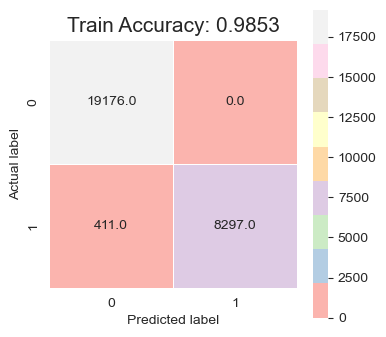

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19176
           1       1.00      0.95      0.98      8708

    accuracy                           0.99     27884
   macro avg       0.99      0.98      0.98     27884
weighted avg       0.99      0.99      0.99     27884



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
train_c_matrix = confusion_matrix(y_train, y_train_pred) # Compute the train,confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True,cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()
# Print the train classification report
print('Classification Report for the Train Subset: \n\n',classification_report(y_train, y_train_pred))

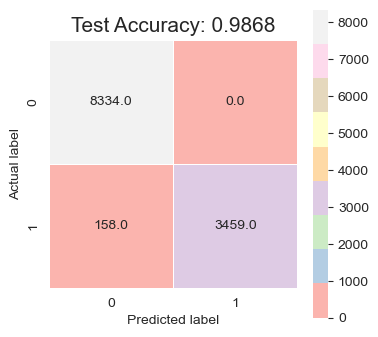

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8334
           1       1.00      0.96      0.98      3617

    accuracy                           0.99     11951
   macro avg       0.99      0.98      0.98     11951
weighted avg       0.99      0.99      0.99     11951



In [ ]:
# Computing the confusion matrix for the test subset
test_c_matrix = confusion_matrix(y_test, y_test_pred) # Compute the test confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True,cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()
# Print the train classification report
print('Classification Report for the Test Subset: \n\n',classification_report(y_test, y_test_pred))

### Interpretation:

Here Class 0 indicates the Cash and Class 1 Indicates the Credit.

1. For train:

When we keenly observe the Classification report,

* The precision for class 0 is 0.98, which indicates that out of all the instances that the model predicted as class 0, 98% of them were actually class 0.

* The precision for class 1 is 1.0, which indicates that out of all the instances that the model predicted as class 1, all of them were actually class 1.

* The recall for class 0 is 1.0, which indicates that out of all the actual class 0 instances, the model correctly predicted all of them as class 0.

* The recall for class 1 is 0.95, which indicates that out of all the actual class 1 instances, the model correctly predicted 95% of them as class 1.

* The F1-score for class 0 is 0.99, which is the harmonic mean of precision and recall for class 0.

* Similarly, the F1-score for class 1 is 0.98.

* The accuracy of the model on the train subset is 0.99, which means that the model predicted 99% of instances correctly.

* The macro-average F1-score and weighted-average F1-score are both 0.98, which indicate that the model performs well on both classes.

2. For Test:

* The precision for class 0 and class 1 is 0.98 and 1.00 respectively, which indicates that the model predicted the majority of the negative (class 0) and positive (class 1) instances correctly.

* The recall for class 0 and class 1 is also high, indicating that the model was able to identify most of the actual negative and positive instances in the test set. The F1-score for both classes is high, indicating that the model has a good balance between precision and recall.

* The weighted average of precision, recall, and F1-score is also high, which indicates that the model performed well overall on the test set. The accuracy of the model on the test set is 0.99, which indicates that the model classified 99% of the instances in the test set correctly.


If we compare both classification reports, both the train and test models show high accuracy scores of 0.99.
The precision, recall, and f1-scores are also high for both classes (0 and 1), indicating good performance of the models in predicting both classes.

There is no that much difference in the performance of the models on the train and test subsets, as both models have similar precision, recall, and f1-scores.

### Applied Grid Search

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
lr = LogisticRegression()

# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga','lbfgs']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', C=0.01, solver='liblinear', random_state=1, max_iter=1000,multi_class='auto') # Instantiate

In [ ]:
# train the model
logreg.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000, random_state=1, solver='liblinear')

In [ ]:
y_train_pred_prob = logreg.predict_proba(X_train)
# Calculating probabilities␣↪→of the two classes in train subset
y_test_pred_prob = logreg.predict_proba(X_test) # Calculating probabilities␣↪→of the two classes in test subset
# Presenting the probabilities for the 1st 10 instances in train subset
print('Train predictions for probabilities:\n\n', y_train_pred_prob[:10],'\n')
# Presenting the probabilities for the 1st 10 instances in test subset
print('Test predictions for probabilities:\n\n', y_test_pred_prob[:10])

Train predictions for probabilities:

 [[9.98895583e-01 1.10441665e-03]
 [3.92954900e-07 9.99999607e-01]
 [2.71283794e-06 9.99997287e-01]
 [2.14215057e-01 7.85784943e-01]
 [9.37600033e-02 9.06239997e-01]
 [9.42545125e-01 5.74548751e-02]
 [9.67841653e-01 3.21583467e-02]
 [9.35478198e-01 6.45218023e-02]
 [9.35918010e-12 1.00000000e+00]
 [6.46828180e-03 9.93531718e-01]] 

Test predictions for probabilities:

 [[9.86973986e-01 1.30260144e-02]
 [9.64635145e-01 3.53648545e-02]
 [9.26888812e-01 7.31111876e-02]
 [6.98503254e-05 9.99930150e-01]
 [9.50070950e-01 4.99290505e-02]
 [9.36633648e-01 6.33663523e-02]
 [9.74881812e-01 2.51181875e-02]
 [5.37874318e-02 9.46212568e-01]
 [4.19416895e-02 9.58058310e-01]
 [9.58367722e-01 4.16322777e-02]]


In [ ]:
y_train_pred = y_train_pred_prob.argmax(axis=1) # Finding the predicted class␣↪→for train predictions
y_test_pred = y_test_pred_prob.argmax(axis=1)

In [ ]:
from sklearn import metrics # Importing 'metrics' from sklearn
train_score = metrics.accuracy_score(y_train, y_train_pred) # train accuracy
test_score = metrics.accuracy_score(y_test, y_test_pred) # test accuracy
print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.98544 

Test accuracy score of the model is  0.9867


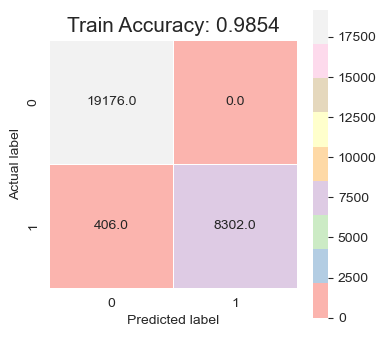

Classification Report for the Train Subset After Grid Search: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19176
           1       1.00      0.95      0.98      8708

    accuracy                           0.99     27884
   macro avg       0.99      0.98      0.98     27884
weighted avg       0.99      0.99      0.99     27884



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
train_c_matrix = confusion_matrix(y_train, y_train_pred) # Compute the train,confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True,cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()
# Print the train classification report
print('Classification Report for the Train Subset After Grid Search: \n\n',classification_report(y_train, y_train_pred))

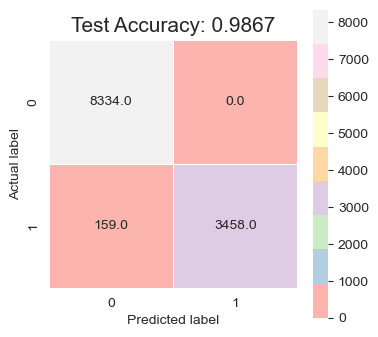

Classification Report for the Test Subset After Grid Search: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8334
           1       1.00      0.96      0.98      3617

    accuracy                           0.99     11951
   macro avg       0.99      0.98      0.98     11951
weighted avg       0.99      0.99      0.99     11951



In [ ]:
# Computing the confusion matrix for the test subset
test_c_matrix = confusion_matrix(y_test, y_test_pred) # Compute the test confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True,cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()
# Print the train classification report
print('Classification Report for the Test Subset After Grid Search: \n\n',classification_report(y_test, y_test_pred))

* The classification report displays the model's performance on the train subset following the use of Grid Search for hyperparameter tuning.

* Without hyperparameter tuning, the precision, recall, and f1-score for both classes (0 and 1) are nearly same and identical to previous one. T

* The model's accuracy is also the same. This suggests that the initial model was already performing fairly well and that tuning the hyperparameters did not significantly enhance that performance.

* The model still exhibits very high precision, recall, and f1-score overall, demonstrating its suitability for predicting payment mode.


# Decision Tree

In [ ]:
from sklearn import tree # Importing 'tree' module from sklearn
tr_clf = tree.DecisionTreeClassifier() # Instantiating tree classifier
tr_clf.fit(X_train, y_train)
train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)
# Computing various classification evaluation metrics and presenting the classification report

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00     19176
           1       1.00      0.98      0.99      8708

    accuracy                           0.99     27884
   macro avg       1.00      0.99      0.99     27884
weighted avg       0.99      0.99      0.99     27884
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      8334
           1       0.97      0.96      0.97      3617

    accuracy                           0.98     11951
   macro avg       0.98      0.98      0.98     11951
weighted avg       0.98      0.98      0.98     11951



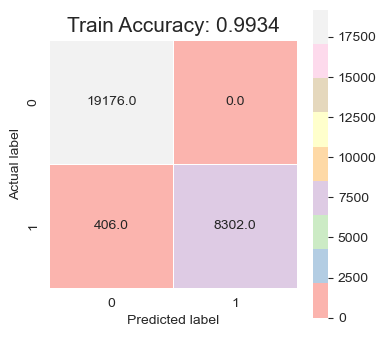

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00     19176
           1       1.00      0.98      0.99      8708

    accuracy                           0.99     27884
   macro avg       1.00      0.99      0.99     27884
weighted avg       0.99      0.99      0.99     27884



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
train_c_matrix = confusion_matrix(y_train, y_train_pred) # Compute the train,confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True,cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()
# Print the train classification report
print('Classification Report for the Train Subset: \n\n',classification_report(y_train, train_y_pred))

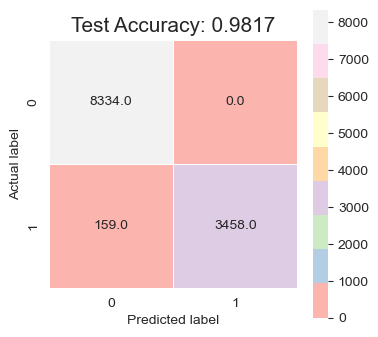

Classification Report for the Test Subset After Grid Search: 

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      8334
           1       0.97      0.96      0.97      3617

    accuracy                           0.98     11951
   macro avg       0.98      0.98      0.98     11951
weighted avg       0.98      0.98      0.98     11951



In [ ]:
# Computing the confusion matrix for the test subset
test_c_matrix = confusion_matrix(y_test, y_test_pred) # Compute the test confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True,cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()
# Print the train classification report
print('Classification Report for the Test Subset After Grid Search: \n\n',classification_report(y_test, test_y_pred))

So, When we look at the classification reports of decision Trees,

* According to the train classification report, the model has high precision and recall values for both classes and a 99% accuracy rate.

* The model has perfect precision and recall for the majority class (0) and slightly less accurate but still very good precision and recall for the minority class (1).

* when we look at the test report, it says that the model has high precision and recall values for both classes and a 98% accuracy.

* We can also see that there is slightly lower precision and recall values for both classes, the model's performance is slightly lower on the test subset compared to the train subset.

* But still,the model still performs well on the test subset.

# SVM

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
def svm_clf(X_tr, X_ts, y_tr, y_ts, ker, C, gamma='auto', r=0, deg=1):
    clf = svm.SVC(kernel=ker, gamma=gamma, C=C, coef0=r, degree=deg)
    clf.fit(X_tr, y_tr) # Fit the train data
    y_tr_pred = clf.predict(X_tr) # Predict the target for train data
    y_ts_pred = clf.predict(X_ts) # Predict the target for test data
    tr_score = metrics.accuracy_score(y_tr, y_tr_pred) # Compute train accuracy
    ts_score = metrics.accuracy_score(y_ts, y_ts_pred) # Compute test accuracy
    tr_report = classification_report(y_tr, y_tr_pred) # Generate,classification report for train data
    ts_report = classification_report(y_ts, y_ts_pred) # Generate,classification report for test data
    print('Train Classification Report: \n\n', tr_report,'\n\n')
    print('Test Classification Report: \n\n', ts_report)
    return

In [ ]:
# Apply linear SVM with very low budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='linear', C=0.01)

Train Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19176
           1       1.00      0.96      0.98      8708

    accuracy                           0.99     27884
   macro avg       0.99      0.98      0.98     27884
weighted avg       0.99      0.99      0.99     27884
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8334
           1       1.00      0.96      0.98      3617

    accuracy                           0.99     11951
   macro avg       0.99      0.98      0.99     11951
weighted avg       0.99      0.99      0.99     11951



* The model has performed well on both the train and test subsets when using a linear kernel. The model's 99% accuracy on the train and test subsets shows that it has successfully learned the patterns in the data and is capable of making reliable predictions.

* When we consider precision,The model has performed well for both classes with precisions of 0.98 and 1.00 for classes 0 and 1, respectively. This indicates that the predictions made by the model for both classes are very accurate and rarely false positive.

* The recall for classes 0 and 1 of 1.00 and 0.96, respectively. This indicates that a large proportion of the true positives for class 0 are correctly identified by the model, compared to a slightly lower proportion for class 1.

* We can say that there is a good balance in F-1 scores and the results obtained are very good with linear kernel.

In [ ]:
 # Apply radial SVM with a relatively high budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='rbf', C=10)


Train Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19176
           1       1.00      0.96      0.98      8708

    accuracy                           0.99     27884
   macro avg       0.99      0.98      0.99     27884
weighted avg       0.99      0.99      0.99     27884
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      8334
           1       0.97      0.95      0.96      3617

    accuracy                           0.98     11951
   macro avg       0.98      0.97      0.97     11951
weighted avg       0.98      0.98      0.98     11951



When we perform SVM with rbf kernel,
For Train:
* The model's accuracy was 0.99, meaning that 99% of the instances were correctly classified.

* The accuracy for class 0 is 0.98, meaning that 98% of all instances predicted to be in class 0 were in fact in class 0.

* Since class 1 had a precision of 1, 100% of the instances that were predicted to be in class 1 actually were. Class 0 has a recall of 1.00, which indicates that, of all instances that actually fall into this category, 100% were correctly identified as such.

* The recall for class 1 is 0.96, which means that out of all the instances that are actually class 1, 96% were correctly classified as class 1.

For Test:
* The model correctly identified 98% of the instances in the test set, achieving an accuracy of 0.98. The accuracy for class 0 is 0.98, which means that 98% of all instances predicted to be in class 0 were in fact in class 0.

*  The accuracy for class 1 is 0.97, which means that 97% of all instances predicted to be in class 1 were in fact in class 1.

* Recall for class 0 is 0.99, which indicates that 99% of instances that should be classified as class 0 were correctly identified.

* Recall for class 1 is 0.95, which indicates that 95% of instances that should have been classified as class 1.

#### When we compare the results with linear and rbf:
* We can see that in terms of accuracy, precision, recall, and f1-score, both models perform well. They perform differently, though, in some ways.

* The linear SVM model performs slightly better in identifying customers who are likely to make payments through cash for class 0, as justified by slightly higher precision and recall scores for class 0.

*  The RBF SVM model, on the other hand, has a bit higher recall for class 1, which means it is  more effective at identifying customers who are more likely to pay using a credit card.

#### Reasons for not performing using poly:

When I tried to run SVM using poly, My Mac M1 Air is not that much configured and it took me around 4-5hrs but still the results are not obtained and also the kernel got dead.

#### So By this we can raise a drawback for SVM that,
It is computationally expensive and takes much time to run.

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2, random_state=3)
rf_clf.fit(X_train, y_train)
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data
print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19176
           1       1.00      0.96      0.98      8708

    accuracy                           0.99     27884
   macro avg       0.99      0.98      0.99     27884
weighted avg       0.99      0.99      0.99     27884
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8334
           1       1.00      0.96      0.98      3617

    accuracy                           0.99     11951
   macro avg       0.99      0.98      0.99     11951
weighted avg       0.99      0.99      0.99     11951



* By looking at the classification report we can observe that, both classes have high precision values (0.98 for class 0 and 1.00 for class 1), demonstrating the model's capability to correctly predict each class.

* The model is able to recognize all of the true negatives, the high recall for class 0 (score of 1.00).

* Recall for class 1 is slightly lower, at 0.96, suggesting that some true positives may have been missed by the model.

* Both classes have high f1-scores, which represent the harmonic mean of precision and recall and show a good balance between the two.

* Similarly, when we look at the Test report, The precision and f1-score for both classes are high in the test classification report, with values of 0.98 and 0.99 for class 0, and 1.00 and 0.98 for class 1, respectively.

* The model is able to recognize all of the true negatives in the test set, the recall score for class 0 being 1.00.

* The model may missed  some of the true positives in the test set, as the recall score for class 1 is slightly lower at 0.96.

# Hyper-Parameteres Tuning

In [ ]:
# Decision Tree Hyper-tuning
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)),
          'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=3),
                              params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_
tr_clf = tree.DecisionTreeClassifier(max_leaf_nodes=19)
tr_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=19)

In [ ]:
train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred)
test_score = metrics.accuracy_score(y_test, test_y_pred)
train_report = classification_report(y_train, train_y_pred)
test_report = classification_report(y_test, test_y_pred)
print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report,'\n\n')

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19176
           1       1.00      0.96      0.98      8708

    accuracy                           0.99     27884
   macro avg       0.99      0.98      0.99     27884
weighted avg       0.99      0.99      0.99     27884
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8334
           1       1.00      0.96      0.98      3617

    accuracy                           0.99     11951
   macro avg       0.99      0.98      0.99     11951
weighted avg       0.99      0.99      0.99     11951
 




* The decision tree model's accuracy on the test set was 0.98 before tuning, with precisions of 0.98 for the majority class (class (0)) and 0.97 for the minority class (class (1)).

* Recall  for the majority class were 0.99 and for the minority class were 0.96. The majority class's f1-score was 0.99, while the minority class's was 0.97.

* The decision tree model performed even better after tuning, with an accuracy of 0.99 on the test set and nearly perfect precision, recall, and f1-score for both majority and minority classes.

* So, we can say that, grid search tuning of the model parameters enhanced the performance of the decision tree model.

We have also tried Xg Boost and Gradient Boosting

# Xg Boost


In [ ]:

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# train model
bst = xgb.XGBClassifier()

bst.fit(X_train, y_train)

# make predictions on train and test sets
train_y_pred = bst.predict(X_train)
test_y_pred = bst.predict(X_test)

train_score = metrics.accuracy_score(y_train, train_y_pred)
test_score = metrics.accuracy_score(y_test, test_y_pred)
train_report = classification_report(y_train, train_y_pred)
test_report = classification_report(y_test, test_y_pred)
print('Xgboost Train Classification Report: \n\n', train_report,'\n\n')
print('Xgboost Test Classification Report: \n\n', test_report,'\n\n')

Xgboost Train Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19176
           1       1.00      0.96      0.98      8708

    accuracy                           0.99     27884
   macro avg       0.99      0.98      0.99     27884
weighted avg       0.99      0.99      0.99     27884
 


Xgboost Test Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8334
           1       1.00      0.96      0.98      3617

    accuracy                           0.99     11951
   macro avg       0.99      0.98      0.99     11951
weighted avg       0.99      0.99      0.99     11951
 




 When we look at the reports, we can say that Xg Boost performd well and
 * It shows 99% accuracy in both the training and test classification reports which means that the model is very successful at predicting the target variable.

* The model is able to accurately identify both the positive and negative cases, as shown by the high precision and recall values for both classes (0 and 1).

* Both classes have high f1-scores, a measurement of the model's balance between recall and precision.

* Overall, we can say that the XGBoost model can correctly classify the target variable and is also a  good fit.


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# create GradientBoostingClassifier object
gb_clf = GradientBoostingClassifier()

# train model
gb_clf.fit(X_train, y_train)

# make predictions on train and test sets
train_y_pred = gb_clf.predict(X_train)
test_y_pred = gb_clf.predict(X_test)

train_score = metrics.accuracy_score(y_train, train_y_pred)
test_score = metrics.accuracy_score(y_test, test_y_pred)
train_report = classification_report(y_train, train_y_pred)
test_report = classification_report(y_test, test_y_pred)
print('Gradient Boosting Train Classification Report: \n\n', train_report,'\n\n')
print('Gradient Boosting Test Classification Report: \n\n', test_report,'\n\n')

Gradient Boosting Train Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19176
           1       1.00      0.96      0.98      8708

    accuracy                           0.99     27884
   macro avg       0.99      0.98      0.99     27884
weighted avg       0.99      0.99      0.99     27884
 


Gradient Boosting Test Classification Report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8334
           1       1.00      0.96      0.98      3617

    accuracy                           0.99     11951
   macro avg       0.99      0.98      0.99     11951
weighted avg       0.99      0.99      0.99     11951
 




* The Gradient Boosting model performed very well on both the train and test, according to its classification reports. On both datasets, the model's accuracy was 0.99, demonstrating that the data fit the model well.

* But we know that Accuracy is not the single parameter to look on,

* The model was able to correctly identify the vast majority of the positive class (class 1) instances with only a small number of false positives, according to the precision scores of 0.98 for class 0 and 1.00 for class on both Train and test.

* The model was able to identify nearly all of the negative class (class 0) instances, according to the recall scores of 1.00 for class 0 and 0.96 for class 1, but only a small portion of the positive class instances were missed.

But Overall, we can say that, this model is good.


# Final Model Selection

As we can see that almost all models have nearest similar accuracies and even f-1 scores, recall and precision is also high for almost all parameters.
So, From the knowledge obtained from Occum razor, where we need to select simpler models, and also by considering the less computational time and cost and efficiency and hardware support and also other parameters like interpretability,
We have chosen ***Logistic Regression*** as our final model.

Some of the Features:

* Logistic Regression is one of the famous algorithm models for Binary classification
* Scalable
* Less Computational time and inexpensive
* Robust to noise

##### Q. What if we are not concerned about interpretability or computational efficiency..?
**A**. We may consider to use an ensemble model such as random forest, xg boost, or gradient boosting, as these models have been shown to have high predictive performance in many tasks.

# Conclusions and Assumptions

* Firstly Most of the payments are made through cash.

* Almost all the models performed well and acquired good accuracy.

* logistic regression model performed very well in predicting the target variable on both the train and test subsets with 99% accuracy . The precision, recall, and f1-score metrics were all very high, indicating that the model was able to accurately classify both the positive and negative classes. logistic regression is a commonly used and effective algorithm for binary classification problems.

* The high precision, recall, and F1 scores for both classes in the training and testing set suggest that the decision tree model is a good fit for the given data and can accurately classify instances into their respective classes. the model's performance on the testing set (98% accuracy) suggests that it can generalize well to new data.

* The SVM model achieved high precision, recall, and F1-score for both the training and testing datasets. With an accuracy of 99%, it demonstrates excellent performance in classifying the data. The model shows consistent results, indicating its effectiveness in accurately predicting the classes.

* The Random Forest Classifier demonstrated excellent performance on both the training and testing datasets, with high precision, recall, and F1-scores. With an accuracy of 99%, it effectively classified the data, indicating its strong predictive capabilities and generalization ability.

* Friday had the highest frequency of trips, followed by Sunday and Tuesday.

* Taxi Affiliation Services had the highest trip revenue, followed by Dispatch Taxi Affiliation

* Taxi Affiliation Services had the highest number of cash payments and credit card payments.

* The highest frequency of trips is observed during the 18th, 19th, and 20th hours.


# References:

1. Lecture Notes from 1 to 13.
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://scikit-learn.org/stable/modules/tree.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

